# **Concepts couverts:**

- <a href = #link1>Distribution Binomiale</a>
- <a href = #link2>Distribution uniforme continue</a>
- <a href = #link3>Distribution Normale</a>
- <a href = #link4>Théorème central limite (TCL)</a>
- <a href = #link5>Estimation ponctuelle</a>
- <a href = #link6>Intervalle de confiance</a>






# <a name='link1'>**La distribution binomiale**</a>

## Énoncé du problème
80 % de tous les visiteurs du musée Lavista finissent par acheter des souvenirs dans la boutique de souvenirs du musée. Le dimanche prochain, si un échantillon aléatoire de 10 visiteurs est choisi  :

1. Trouvez la probabilité que chaque visiteur finisse par acheter dans la boutique de souvenirs 
2. Trouvez la probabilité qu'un maximum de 7 visiteurs achètent des souvenirs dans la boutique de souvenirs

Vérifions d'abord si nous satisfaisons les hypothèses de la distribution binomiale.
*  Il n'y a que deux résultats possibles (succès ou échec) pour chaque essai - Un visiteur achètera des souvenirs dans la boutique de souvenirs ou non (oui ou non).
* Le nombre d'essais (n) est fixe - Il y a 10 visiteurs dans l'échantillon.
* Chaque essai est indépendant des autres essais - Il est raisonnable de supposer que l'activité d'achat des visiteurs est indépendante.
* La probabilité de succès (p) est la même pour chaque essai - La probabilité de succès pour chaque visiteur est de 0,8.

### Importons les bibliotheques

In [ ]:
# Importation des packages importants
import pandas as pd  # Bibliothèque utilisée pour l'analyse et la manipulation des données
import numpy as np  # Bibliothèque utilisée pour travailler avec les tableaux
import matplotlib.pyplot as plt  # Bibliothèque utilisée pour les tracés
import seaborn as sns  # Bibliothèque utilisée pour la visualisation des données

%matplotlib inline

import scipy.stats as stats  # cette bibliothèque contient un grand nombre de distributions de probabilité ainsi qu'une bibliothèque croissante de fonctions statistiques

### Estimons la distribution de probabilité des visiteurs

In [ ]:
# D'abord, nous déclarons la taille de l'échantillon dans une variable notée n qui représente le nombre de visiteurs tirés au sort
n = 10

In [ ]:
# déclarer p qui représente la probabilité de succès, c'est-à-dire la probabilité qu'un visiteur finisse par acheter un souvenir
p = 0.80

In [ ]:
# déclarer différents nombres possibles de visiteurs sélectionnés dans un tableau numpy
k = np.arange(0,11)
k

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

La fonction de probabilité de la distribution binomiale fournit la probabilité pour  x  nombre de succès à partir de n essais où  p est la probabilité de succès 

>$$P(X=x)= {n\choose x}p^x(1-p)^{n-x}$$


Ici, nous savons que :

* n ( nombre de visiteurs choisis au hasard ) = 10
* p (probabilité de succès c'est-à-dire la probabilité qu'un visiteur finisse par acheter un souvenir) = 0,80
* q (probabilité d'échec c'est-à-dire la probabilité qu'un visiteur ne finisse pas par acheter un souvenir) = 1 - 0,80 = 0,20
* x (nombre de succès) = 10


Nous allons utiliser binom.pmf() pour calculer cette fonction de probabilité qui fournit la probabilité du nombre de visiteurs (sur n=10) qui finiront par acheter des souvenirs à la boutique de souvenirs.

In [ ]:
# importer la fonction requise
from scipy.stats import binom

# utilisez la fonction binom.pmf() pour générer la distribution de probabilité
binomial = binom.pmf(k=k, n=n, p=p)

In [ ]:
binomial

array([1.02400000e-07, 4.09600000e-06, 7.37280000e-05, 7.86432000e-04,
       5.50502400e-03, 2.64241152e-02, 8.80803840e-02, 2.01326592e-01,
       3.01989888e-01, 2.68435456e-01, 1.07374182e-01])

Comme vous pouvez le voir, la variable appelée **binomial** est un tableau qui contient les probabilités pour chaque nombre différent de succès. Visualisons la même chose dans le graphique suivant.

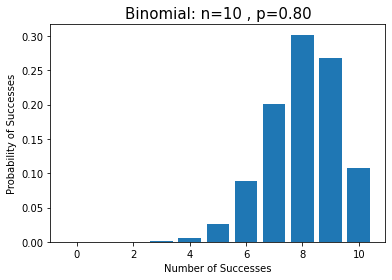

In [ ]:
# tracer la distribution
plt.bar(k, binomial) # make a bar plot
plt.title("Binomial: n=%i , p=%.2f" % (n, p), fontsize=15) # définir le titre
plt.xlabel("Number of Successes") # définir l'étiquette de l'axe des x
plt.ylabel("Probability of Successes") # définir l'étiquette de l'axe des y
plt.show() # afficher le tracé

Le dernier élément de ce tableau **binomial** représente la probabilité lorsque le nombre de succès est de 10 (ce qui signifie que les 10 visiteurs (sur 10 sélectionnés au hasard) achèteront des souvenirs à la boutique de souvenirs)

In [ ]:
binomial[10]

0.10737418240000006

La probabilité ci-dessus montre que la probabilité qu'exactement 10 visiteurs achètent des souvenirs est d'environ 0,11.

Maintenant, nous souhaitons connaître la probabilité d'au plus 7 succès, c'est-à-dire quelle est la probabilité que sur 10 visiteurs sélectionnés au hasard, un maximum de 7 visiteurs achètent des souvenirs dans la boutique de souvenirs.

Ici, nous devons calculer la probabilité pour $P(X\leq 7)$. CDF est utilisé pour calculer la probabilité cumulée.



**CDF :** d'une variable aléatoire (X) est la probabilité que X prenne la valeur inférieure ou égale à x. Il peut être représenté mathématiquement comme ci-dessous.

>$F_X(x) = P(X\leq x)$

Dans notre cas, la variable aléatoire (X) est le nombre de visiteurs qui achèteront des souvenirs à la boutique de souvenirs.

$P(X\leq 7)$


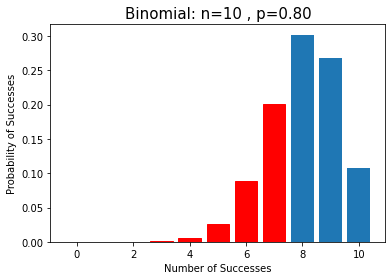

In [ ]:
# tracer la distribution de probabilité
# Nous traçons ici les distributions pour mieux visualiser les calculs.
# Bien sûr, vous n'avez pas "besoin" de créer la visualisation suivante pour répondre à la question ci-dessus.
# Vous pouvez utiliser directement la fonction cdf pour les calculs de probabilité.
barl = plt.bar(k, binomial) # faire un bar plot
plt.title("Binomial: n=%i , p=%.2f" % (n, p), fontsize=15) # Définir le titre
plt.xlabel("Number of Successes") # définir l'étiquette de l'axe des x
plt.ylabel("Probability of Successes") # définir l'étiquette de l'axe y
for i in range(0, 8):
    barl[i].set_color("r") # colorer les barres en rouge lorsque le nombre de réussites est inférieur à 8
plt.show() # afficher le tracé

Dans le graphique ci-dessus, la région rouge représente P(X<=7).
Calculons la probabilité que sur 10 visiteurs choisis au hasard, 7 au maximum achètent des souvenirs à la boutique de souvenirs. Nous utiliserons binom.cdf() pour cela.

In [ ]:
# calcul de la fonction de répartition (cumulative distribution function : cdf)
binom.cdf(k=7, n=n, p=p)

0.32220047359999987

### Conclusion: 

Il y a 10,74 % de chances que chaque visiteur finisse par acheter des souvenirs dans la boutique de souvenirs.

Il y a 32,22 % de chances qu'un maximum de 7 visiteurs sur 10 achètent des souvenirs à la boutique de souvenirs.

Essayons de changer la probabilité de succès (probabilité que chaque visiteur achète des souvenirs dans la boutique de souvenirs) avec différentes valeurs comme 60 %, 70 %, 90 %, 95 % et visualisons comment la forme de la distribution change.

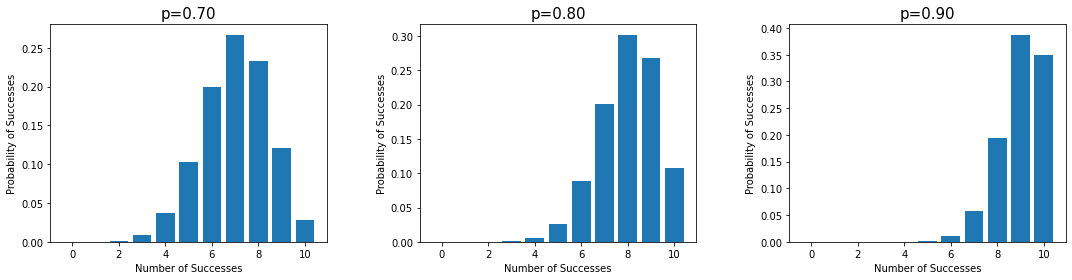

In [ ]:
plt.figure(figsize=(15, 4))

plt.subplot(131)
binomial_70 = binom.pmf(k, n, p=0.7)

# tracer la distribution avec la probabilité de succès = 70%
plt.bar(k, binomial_70)
plt.title("p=%.2f" % (0.7), fontsize=15)
plt.xlabel("Number of Successes")
plt.ylabel("Probability of Successes")

plt.subplot(132)
binomial_80 = binom.pmf(k, n, p=0.8)

# tracer la distribution davec la probabilité de succès = 80%
plt.bar(k, binomial_80)
plt.title("p=%.2f" % (0.8), fontsize=15)
plt.xlabel("Number of Successes")
plt.ylabel("Probability of Successes")

plt.subplot(133)
binomial_90 = binom.pmf(k, n, p=0.9)

# tracer la distribution avec la probabilité de succès = 90%
plt.bar(k, binomial_90)
plt.title("p=%.2f" % (0.9), fontsize=15)
plt.xlabel("Number of Successes")
plt.ylabel("Probability of Successes")

plt.tight_layout(w_pad=5)

### Conclusion:

Il en ressort clairement du graphique ci-dessus que la forme de la distribution change à mesure que la valeur de p (probabilité de succès) change.


# <a name='link2'>**Distribution uniforme continue**</a>

### Énoncé du problème


L'industrie informatique enregistre le temps dont un ingénieur logiciel a besoin pour corriger un bogue lors de la phase initiale du développement logiciel dans "debugging.csv".

Laisser

X = Temps nécessaire pour corriger les bugs


X est une variable aléatoire continue. Voyons la distribution de X et répondons aux questions ci-dessous.


1. Trouver la probabilité qu'un débogage de logiciel sélectionné au hasard nécessite moins de trois heures

2. Trouvez la probabilité qu'un débogage de logiciel sélectionné au hasard nécessite plus de deux heures

3. Trouvez le 50e centile du temps de débogage du logiciel



### Lecture des données dans un Dataframe

In [ ]:
debugging = pd.read_csv("debugging.csv")
debugging.head()

Bug ID  Time Taken to fix the bug
0   12986                       2.42
1   12987                       2.03
2   12988                       2.74
3   12989                       3.21
4   12990                       3.40

Traçons l'histogramme des données avec la PDF (fonction de densité) de la distribution uniforme en utilisant les paramètres temps minimum requis et temps maximum requis pour la correction des bogues.

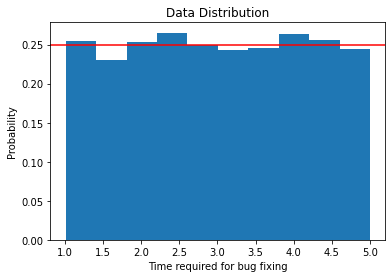

In [ ]:
# visualiser la répartition du temps nécessaire à la correction des bugs
plt.hist(debugging["Time Taken to fix the bug"], density=True)
plt.axhline(1 / 4, color="red")
plt.xlabel("Time required for bug fixing")
plt.ylabel("Probability")
plt.title("Data Distribution")
plt.show()

Une autre façon de reconnaître une distribution uniforme dans vos données consiste à examiner un diagramme de densité. Nous utiliserons displot de la bibliothèque seaborn pour visualiser la répartition du temps nécessaire à la correction des bogues.

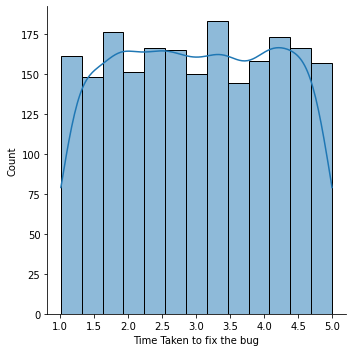

In [ ]:
# Diagramme de densité du temps nécessaire pour corriger le bug
sns.displot(debugging["Time Taken to fix the bug"], kde=True)
plt.show()

**Insight** : Comme vous pouvez le voir sur le graphique ci-dessus, toutes les valeurs comprises entre 1 et 5 ont une probabilité presque égale, nous allons utiliser une distribution uniforme continue. Nous devons décider des points de terminaison. Ici, les points finaux sont 1 et 5.

X ~ U(1, 5)

In [ ]:
# importer la fonction requise
from scipy.stats import uniform

# utilisez la fonction uniform.pdf() pour générer la distribution de probabilité
x = np.linspace(1, 5, 50)
probs = uniform.pdf(x, loc=1, scale=4)

**Trouvez la probabilité qu'un débogage de logiciel sélectionné au hasard nécessite un temps maximum de 3 heures**

**CDF(Fonction de répartition) :** d'une variable aléatoire (X) est la probabilité que X prenne la valeur inférieure ou égale à x. Il peut être représenté mathématiquement comme ci-dessous.

>$$F_X(x) = P(X\leq x)$$


Dans notre cas, la variable aléatoire (X) est le nombre d'heures.

$ P(X\leq 3)$

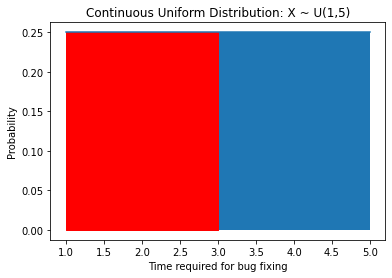

In [ ]:
# tracer la distribution de probabilité
# Nous traçons ici les distributions pour mieux visualiser les calculs.
# Bien sûr, vous n'avez pas "besoin" de créer la visualisation suivante pour répondre à la question ci-dessus.
# Vous pouvez utiliser directement la fonction cdf pour les calculs de probabilité.
x1 = np.linspace(1, 3, 25)
plt.plot(x, probs)
plt.fill_between(x, probs)
plt.fill_between(x1, uniform.pdf(x=x1, loc=1, scale=4), color="r")
plt.xlabel("Time required for bug fixing")
plt.ylabel("Probability")
plt.title("Continuous Uniform Distribution: X ~ U(1,5)")
plt.show()

Dans le graphique ci-dessus, la région rouge représente P(X<=3). Calculons la probabilité qu'un débogage d'un logiciel choisi au hasard nécessite un temps maximum de 3 heures. Nous utiliserons uniform.cdf() pour cela.

In [ ]:
uniform.cdf(x=3, loc=1, scale=4)

0.5


**Trouvez la probabilité qu'une correction de bug du logiciel sélectionnée au hasard nécessite plus de deux heures.**

$ P(X>2)$

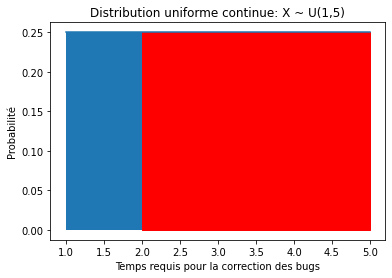

In [ ]:
# tracer la distribution de probabilité
# Nous traçons ici les distributions pour mieux visualiser les calculs.
# Bien sûr, vous n'avez pas "besoin" de créer la visualisation suivante pour répondre à la question ci-dessus.
# Vous pouvez utiliser directement la fonction cdf pour les calculs de probabilité.
x1 = np.linspace(2, 5, 20)
plt.plot(x, probs)
plt.fill_between(x, probs)
plt.fill_between(x1, uniform.pdf(x=x1, loc=1, scale=4), color="r")
plt.xlabel("Temps requis pour la correction des bugs")
plt.ylabel("Probabilité")
plt.title("Distribution uniforme continue: X ~ U(1,5)")
plt.show()

Dans le graphique ci-dessus, la région rouge représente P(X>2). Calculons la probabilité qu'un débogage de logiciel choisi au hasard nécessite plus de deux heures. Nous utiliserons uniform.cdf() pour cela.

In [ ]:
1 - uniform.cdf(x=2, loc=1, scale=4)

0.75

**Calculons le 50e centile du temps de débogage logiciel.**

ppf() : Il est utilisé pour calculer le point centile de la probabilité donnée. Cela fonctionne à l'opposé de cdf()

In [ ]:
uniform.ppf(q=0.5, loc=1, scale=4)

3.0

### Conclusion:  

Il y a 50 % de chances qu'un débogage de logiciel sélectionné au hasard nécessite moins de trois heures.

Il y a 75 % de chances qu'un débogage de logiciel choisi au hasard nécessite plus de deux heures.

Le 50e centile du temps de débogage du logiciel est de 3 heures.

# <a name='link3'>**La distribution normale**</a>

## Énoncé du problème

Une agence de test souhaite analyser la complexité de l'examen SAT 2020. Ils ont collecté les scores SAT de 1000 étudiants dans "sat_score.csv". Répondons à certaines des questions qui aideront à décider de la complexité de l'examen SAT 2020.



1. Calculez la probabilité qu'un étudiant obtienne moins de 800 à l'examen SAT
2. Calculez la probabilité qu'un étudiant obtienne plus de 1300 points à l'examen SAT
3. Calculez les notes minimales qu'un étudiant doit obtenir pour obtenir le 90e centile
4. Calculez les notes minimales qu'un élève doit obtenir pour être dans le top 5 %



### Lecture des données dans le Dataframe

In [ ]:
sat_score = pd.read_csv("sat_score.csv")
sat_score.head()

student_id  score
0           1   1018
1           2   1218
2           3    611
3           4    723
4           5    541

### Calcul de la moyenne et de l'écart type (paramètres) du score SAT 



In [ ]:
# importer la fonction requise
from scipy.stats import norm

# estimer la moyenne et l'écart type des données des scores SAT
mu = sat_score["score"].mean()
sigma = sat_score["score"].std()
print("La moyenne estimée est", round(mu, 2))
print("L'écart type estimé est", round(sigma, 2))

La moyenne estimée est 1007.46
L'écart type estimé est 204.43


### Tracer de la distribution

Cela nous aidera à analyser la forme des données et à visualiser la fonction de densité (PDF) de la distribution normale en utilisant les paramètres (moyenne (mu) et écart type (sigma)) à partir des données.

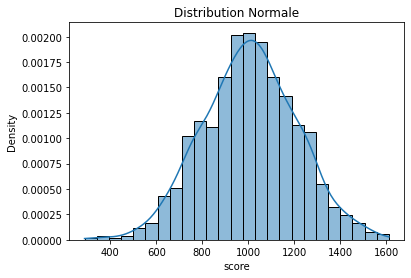

In [ ]:
# calculer le pdf des scores SAT en utilisant norm.pdf()
density = pd.DataFrame() # créer un DataFrame vide
density["x"] = np.linspace(
    sat_score["score"].min(), sat_score["score"].max(), 100
) # créer un tableau de 100 nombres entre la plage de score min et max et le stocker dans la première colonne du DataFrame vide
density["pdf"] = norm.pdf(density["x"], mu, sigma) # calculer le pdf() des nombres créés et le stocker dans une autre colonne nommée 'pdf'
fig, ax = plt.subplots() # créer le tracé du diagramme vide
sns.histplot(sat_score["score"], ax=ax, kde=True, stat="density") #tracer la distribution des données à l'aide d'un histogramme
#ax.plot(density["x"], density["pdf"], color="red") # tracer le pdf de la distribution normale
plt.title("Distribution Normale") # Définir le titre
plt.show() # Afficher le tracé

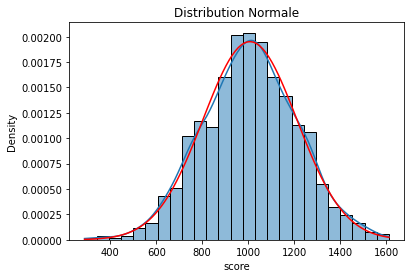

In [ ]:
# calculer le pdf des scores SAT en utilisant norm.pdf()
density = pd.DataFrame() # créer un DataFrame vide
density["x"] = np.linspace(sat_score["score"].min() - 0.01, sat_score["score"].max() + 0.01, 100
) # créer un tableau de 100 nombres entre la plage de score min et max et le stocker dans la première colonne du DataFrame vide
density["pdf"] = norm.pdf(density["x"], mu, sigma) # calculer le pdf() des nombres créés et le stocker dans une autre colonne nommée 'pdf'
fig, ax = plt.subplots() # créer un sous-graphe
sns.histplot(sat_score["score"], ax=ax, kde=True, stat="density") # tracer la distribution des données à l'aide d'un histogramme
ax.plot(density["x"], density["pdf"], color="red") # tracer le pdf de la distribution normale
plt.title("Distribution Normale") # Définir le titre
plt.show() # Afficher le tracé

**Insight :** Comme vous pouvez le voir dans le graphique ci-dessus, il y a deux courbes rouge et bleue. La courbe bleue représente la forme de la distribution des données et la courbe rouge représente la PDF (fonction de densité de probabilité). Ces données sont à peu près normales. Ainsi, nous pouvons supposer que cette distribution de données est normale et effectuer nos calculs sur la base de l'hypothèse de normalité.

X ~ N(mu, sigma)

**Calculez la probabilité qu'un étudiant obtienne moins de 800 points à l'examen SAT.**

In [ ]:
# trouver la probabilité cumulée
# norm.cdf() calcule la probabilité cumulée
prob_less_than_800 = norm.cdf(800, mu, sigma)
print(
    "La probabilité qu'un élève obtienne un score inférieur à 800 est",
    round(prob_less_than_800, 4),
)

La probabilité qu'un élève obtienne un score inférieur à 800 est 0.1551


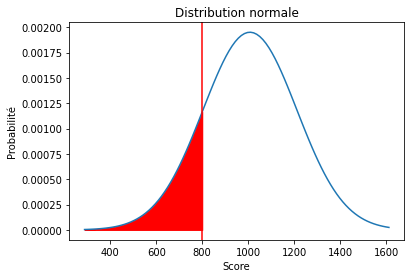

In [ ]:
# tracer la distribution de probabilité
# Nous traçons ici les distributions pour mieux visualiser les calculs.
# Bien sûr, vous n'avez pas "besoin" de créer la visualisation suivante pour répondre à la question ci-dessus.
# Vous pouvez utiliser directement la fonction cdf pour les calculs de probabilité.
plt.plot(density["x"], density["pdf"]) # plot the pdf of the normal distribution
plt.axvline(x=800, c="r") # tracer une ligne verticale rouge à x = 800
x1 = np.linspace(density["x"].min(), 800, 50) # créer un tableau de 50 numéros entre le score SAT min et 800
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color="r") # remplir la région spécifiée avec la couleur rouge
plt.xlabel("Score") # définir l'étiquette de l'axe des x
plt.ylabel("Probabilité") # définir l'étiquette de l'axe des y
plt.title("Distribution normale") # Définir le titre
plt.show() # Afficher le tracé

**Calculez la probabilité qu'un étudiant obtienne plus de 1300 points à l'examen SAT.**

In [ ]:
# trouvez la probabilité cumulée et soustrayez-la de 1 pour calculer la probabilité qu'un élève obtienne plus de 1300
prob_greater_1300 = 1 - norm.cdf(1300, mu, sigma)
print(
    "La probabilité qu'un élève obtienne un score supérieur à 1300 est",
    round(prob_greater_1300, 4),
)

La probabilité qu'un élève obtienne un score supérieur à 1300 est 0.0762


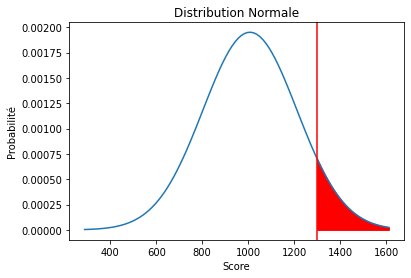

In [ ]:
# tracer la distribution de probabilité associée
# Nous traçons ici les distributions pour mieux visualiser les calculs.
# Bien sûr, vous n'avez pas "besoin" de créer la visualisation suivante pour répondre à la question ci-dessus.
# Vous pouvez utiliser directement la fonction cdf pour les calculs de probabilité.
plt.plot(density["x"], density["pdf"])
plt.axvline(x=1300, c="r")
x1 = np.linspace(1300, density["x"].max(), 50)
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color="r")
plt.xlabel("Score")
plt.ylabel("Probabilité")
plt.title("Distribution Normale")
plt.show()

**Calculez les notes minimales qu'un étudiant doit obtenir pour être dans le 90e centile**

In [ ]:
# calculer le score du 90e centile à l'aide de la fonction ppf()
# norm.ppf() calcule le point centile
score_90th_percentile = norm.ppf(0.90, mu, sigma)
print("Le score du 90e centile doit être", round(score_90th_percentile))

Le score du 90e centile doit être 1269


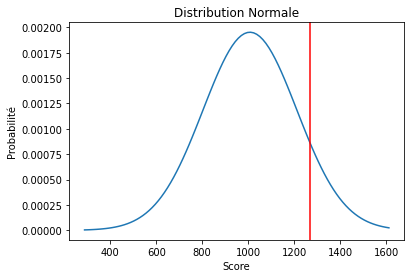

In [ ]:
# tracer la distribution de probabilité
# Nous traçons ici les distributions pour mieux visualiser les calculs.
# Bien sûr, vous n'avez pas "besoin" de créer la visualisation suivante pour répondre à la question ci-dessus.
# Vous pouvez utiliser directement la fonction cdf pour les calculs de probabilité.
plt.plot(density["x"], density["pdf"])
plt.axvline(x=score_90th_percentile, c="r")
plt.xlabel("Score")
plt.ylabel("Probabilité")
plt.title("Distribution Normale")
plt.show()

**Calculez les notes minimales qu'un étudiant doit obtenir pour être dans le top 5 %**

In [ ]:
# calculer le score du 95e centile à l'aide de la fonction ppf()
score_top_five_percent = norm.ppf(0.95, mu, sigma)
print("Le score minimum pour être dans le top 5% doit être", round(score_top_five_percent))

Le score minimum pour être dans le top 5% doit être 1344


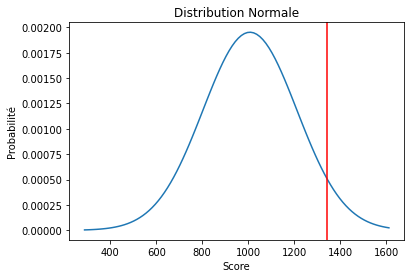

In [ ]:
# tracer la distribution de probabilité
# Nous traçons ici les distributions pour mieux visualiser les calculs.
# Bien sûr, vous n'avez pas "besoin" de créer la visualisation suivante pour répondre à la question ci-dessus.
# Vous pouvez utiliser directement la fonction cdf pour les calculs de probabilité.
plt.plot(density["x"], density["pdf"])
plt.axvline(x=score_top_five_percent, c="r")
plt.xlabel("Score")
plt.ylabel("Probabilité")
plt.title("Distribution Normale")
plt.show()

**Conclusion:** 

1) Seuls 15,51 % des étudiants obtiendront un score inférieur à 800 et 7,62 % des étudiants obtiendront un score supérieur à 1300. Cela montre que la complexité de l'examen SAT 2020 est modérée.

2) Les étudiants doivent marquer au moins 1269 pour obtenir le 90e centile.

3) Les étudiants doivent obtenir au moins 1344 points pour figurer parmi les 5 % les plus performants.

### Normalisation des variables normales

Supposons que nous sachions que les scores SAT sont normalement distribués avec une moyenne de 1000 et un écart type de 200 et que les scores ACT sont normalement distribués avec une moyenne de 20 et un écart type de 5.

Un collège n'offre l'admission que sur la base des scores SAT et ACT. L'administrateur du collège décide d'attribuer la bourse la plus performante à l'étudiant qui a obtenu les meilleurs résultats parmi tous les candidats. Le score le plus élevé reçu des candidats qui ont comparu pour SAT est de 1350 et le score le plus élevé reçu des candidats qui ont comparu pour ACT est de 30.

Aidez le collège à choisir le meilleur candidat pour la bourse !

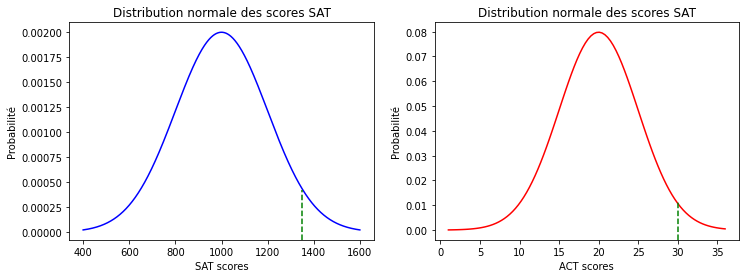

In [ ]:
# tracer les deux distributions pour les scores SAT et ACT
from scipy.stats import norm
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,4))
x = np.linspace(400, 1600, 1000)
ax1.plot(x, norm.pdf(x, loc = 1000, scale = 200), color = 'b')
ax1.set_title('Distribution normale des scores SAT')
ax1.set_xlabel('SAT scores')
ax1.set_ylabel('Probabilité')
ax1.axvline(1350, ymax = 0.23, linestyle = '--', color = 'green')
x1 = np.linspace(1, 36, 100)
ax2.plot(x1, norm.pdf(x1, loc = 20, scale = 5), color = 'r')
ax2.set_title('Distribution normale des scores SAT')
ax2.set_xlabel('ACT scores')
ax2.set_ylabel('Probabilité')
ax2.axvline(30, ymax = 0.18, linestyle = '--', color = 'green')
plt.show()

Dans le graphique ci-dessus, la courbe bleue représente la distribution des scores SAT et la courbe rouge représente la distribution des scores ACT. Les scores les plus élevés des candidats aux examens SAT et ACT sont parsemés de lignes vertes dans les distributions respectives. Cependant, il nous est difficile de comparer les scores bruts les plus élevés dans le graphique ci-dessus. Ainsi, nous devons normaliser les deux scores et comparer leurs Z-scores.

In [ ]:
# trouver le score Z du meilleur scoreur au SAT parmi tous les candidats
top_sat = (1350 - 1000) / 200
print('Le score Z du meilleur scoreur au SAT parmi tous les candidats', top_sat)
# trouver le score Z du meilleur scoreur au ACT parmi tous les candidats
top_act = (30 - 20) / 5
print('Le score Z du meilleur scoreur au ACT parmi tous les candidats', top_act)

Le score Z du meilleur scoreur au SAT parmi tous les candidats 1.75
Le score Z du meilleur scoreur au ACT parmi tous les candidats 2.0


Traçons la distribution normale standard et visualisons les scores standardisés ci-dessus.

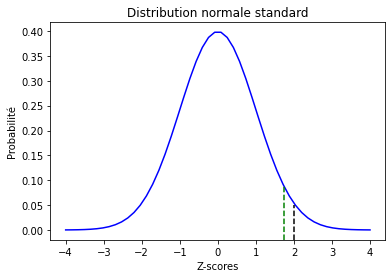

In [ ]:
# tracer la distribution normale standard
# et visualisez les scores standardisés
# Nous traçons ici les distributions pour mieux visualiser les calculs.
fig, ax = plt.subplots()
x = np.linspace(-4,4,50)
ax.plot(x, norm.pdf(x, loc = 0, scale = 1), color = 'b')
ax.set_title('Distribution normale standard')
ax.set_xlabel('Z-scores')
ax.set_ylabel('Probabilité')
ax.axvline(top_sat, ymax = 0.25, linestyle = '--', color = 'green')
ax.axvline(top_act, ymax = 0.16, linestyle = '--', color = 'black')
plt.show()

Dans le graphique ci-dessus, la ligne verte représente le score SAT standardisé le plus élevé des candidats qui est de 1,75 écart type au-dessus de la moyenne et la ligne noire représente le score ACT standardisé le plus élevé des candidats qui est de 2 écarts type au-dessus de la moyenne.

Cela signifie que parmi les candidats, le meilleur scoreur en ACT a obtenu de meilleurs résultats que le meilleur scoreur en SAT.

Ainsi, la bourse la plus performante devrait être attribuée au candidat qui a obtenu le score le plus élevé en ACT.

### **Bases de l'Inférence** **Statistique**

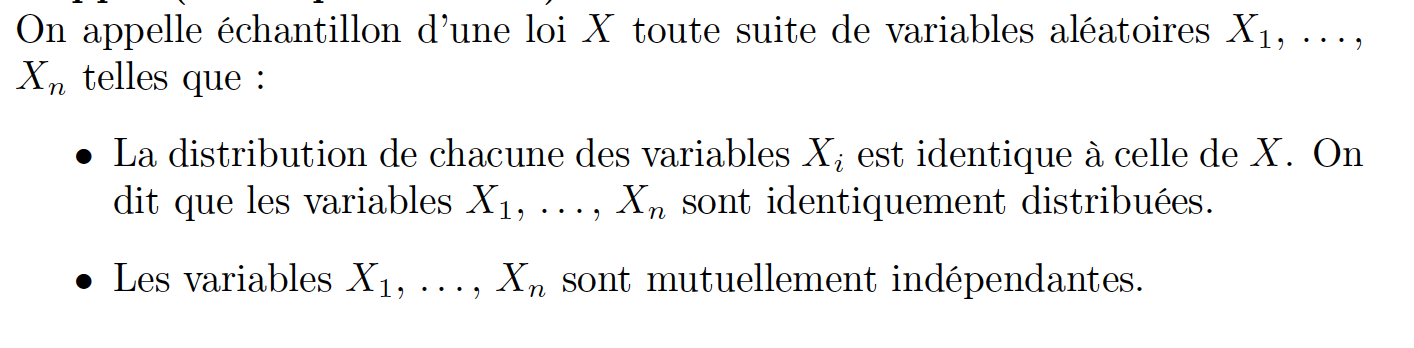

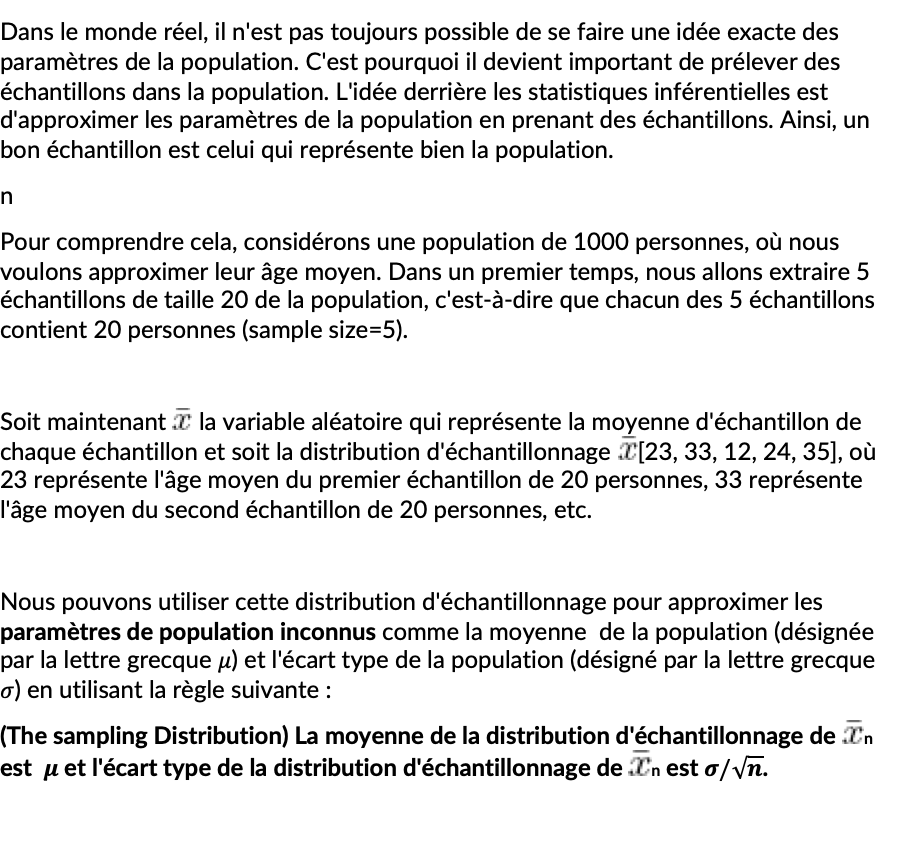

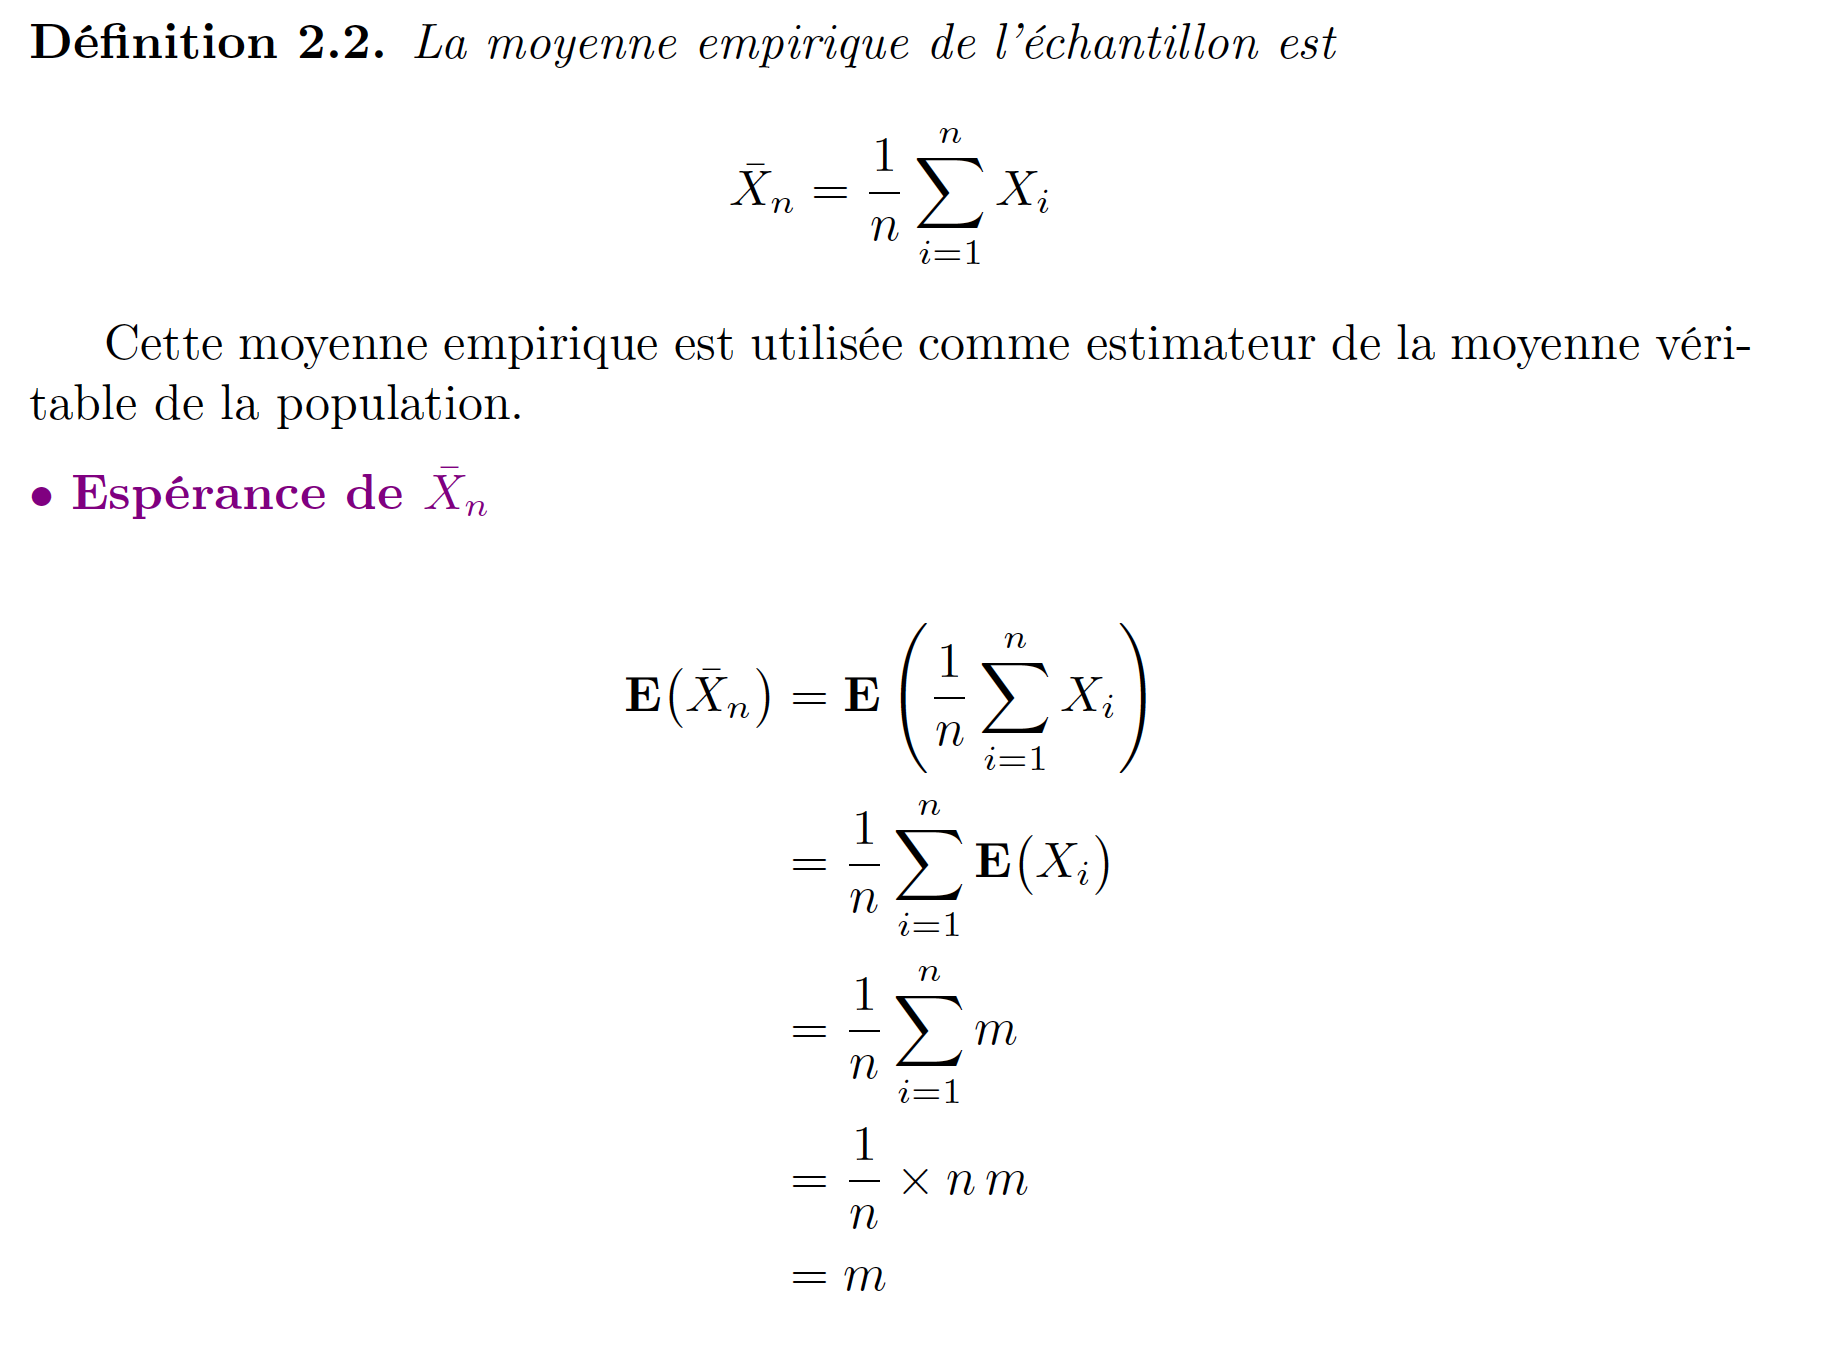

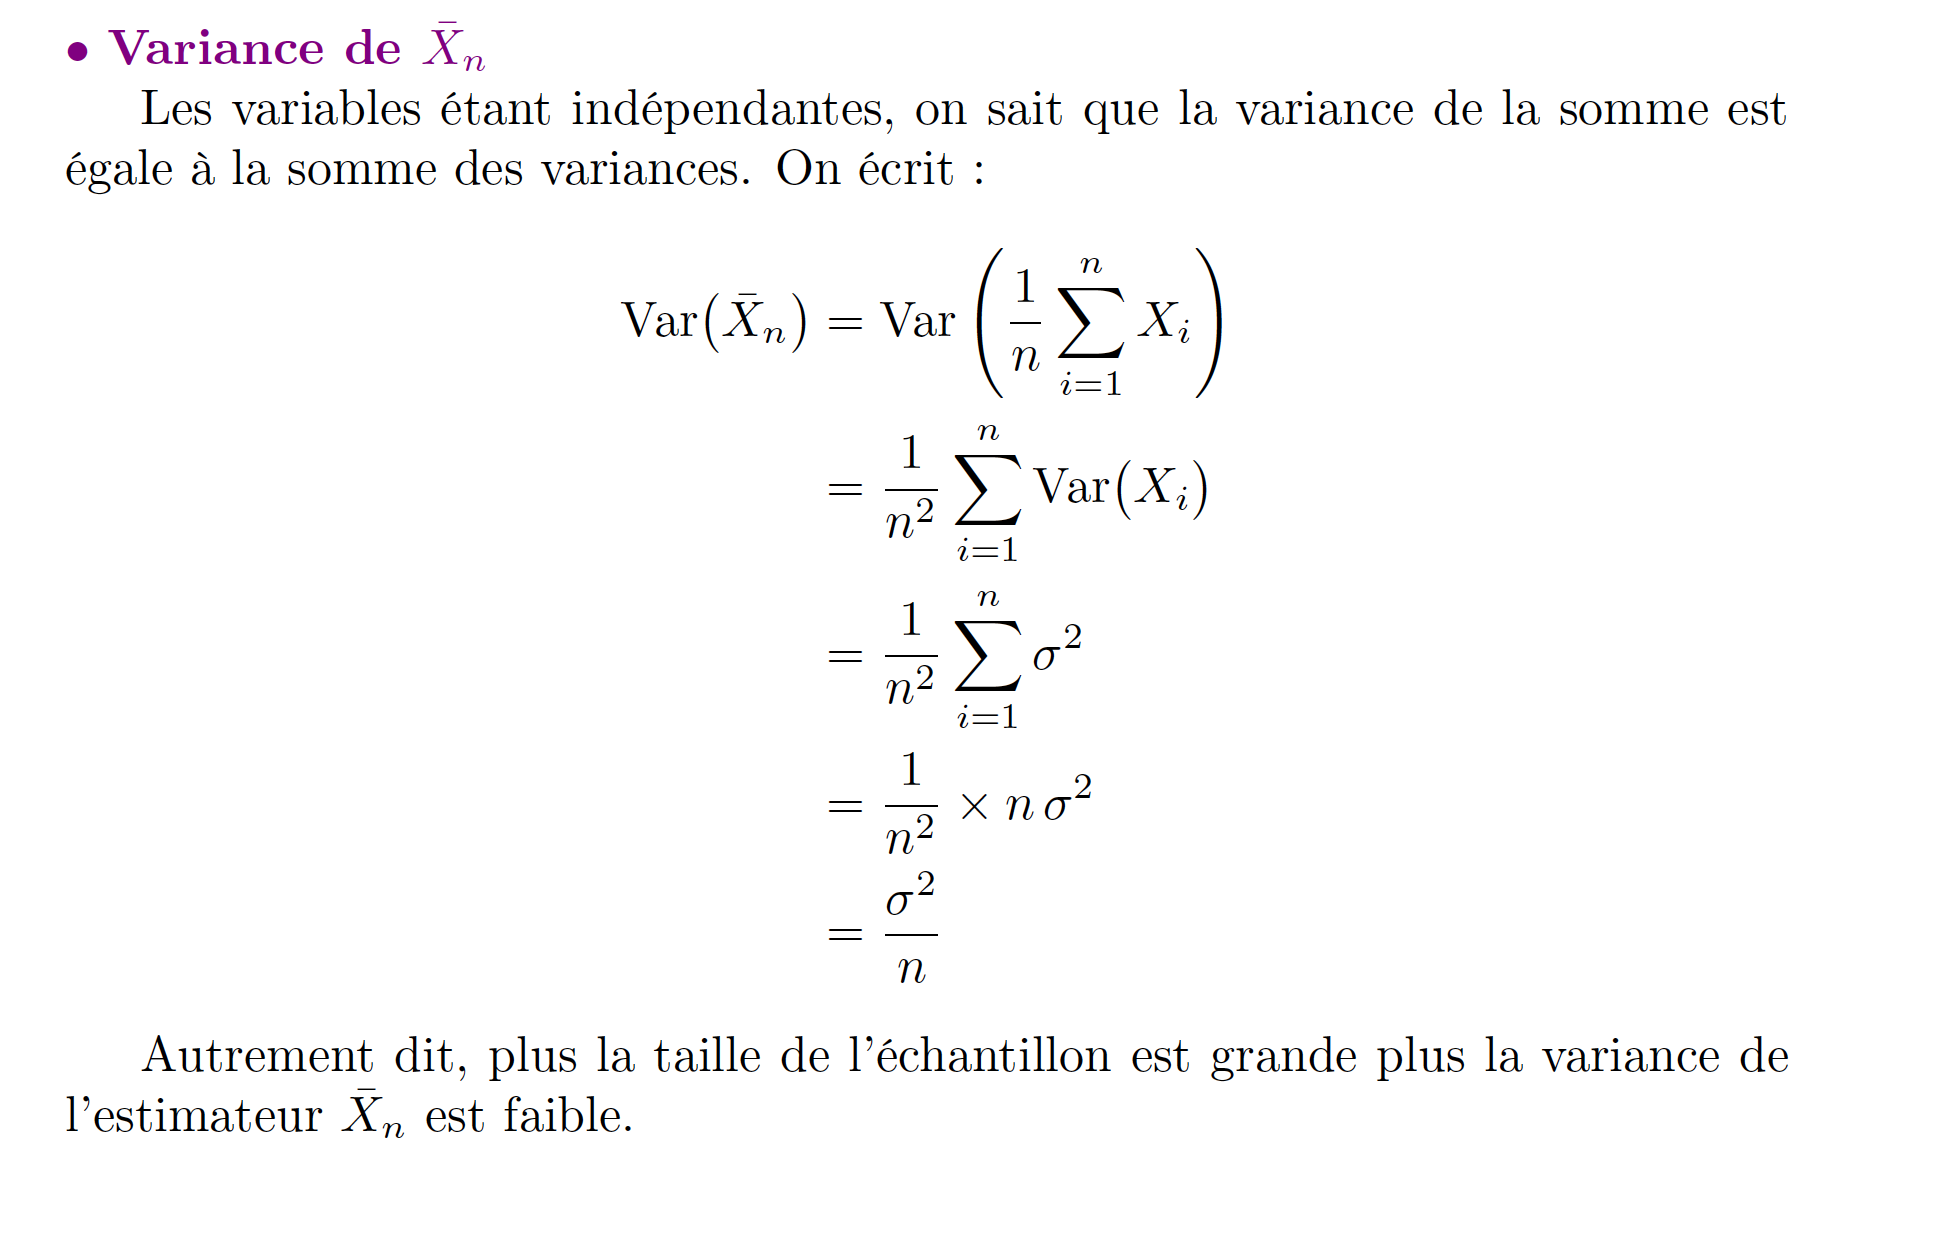

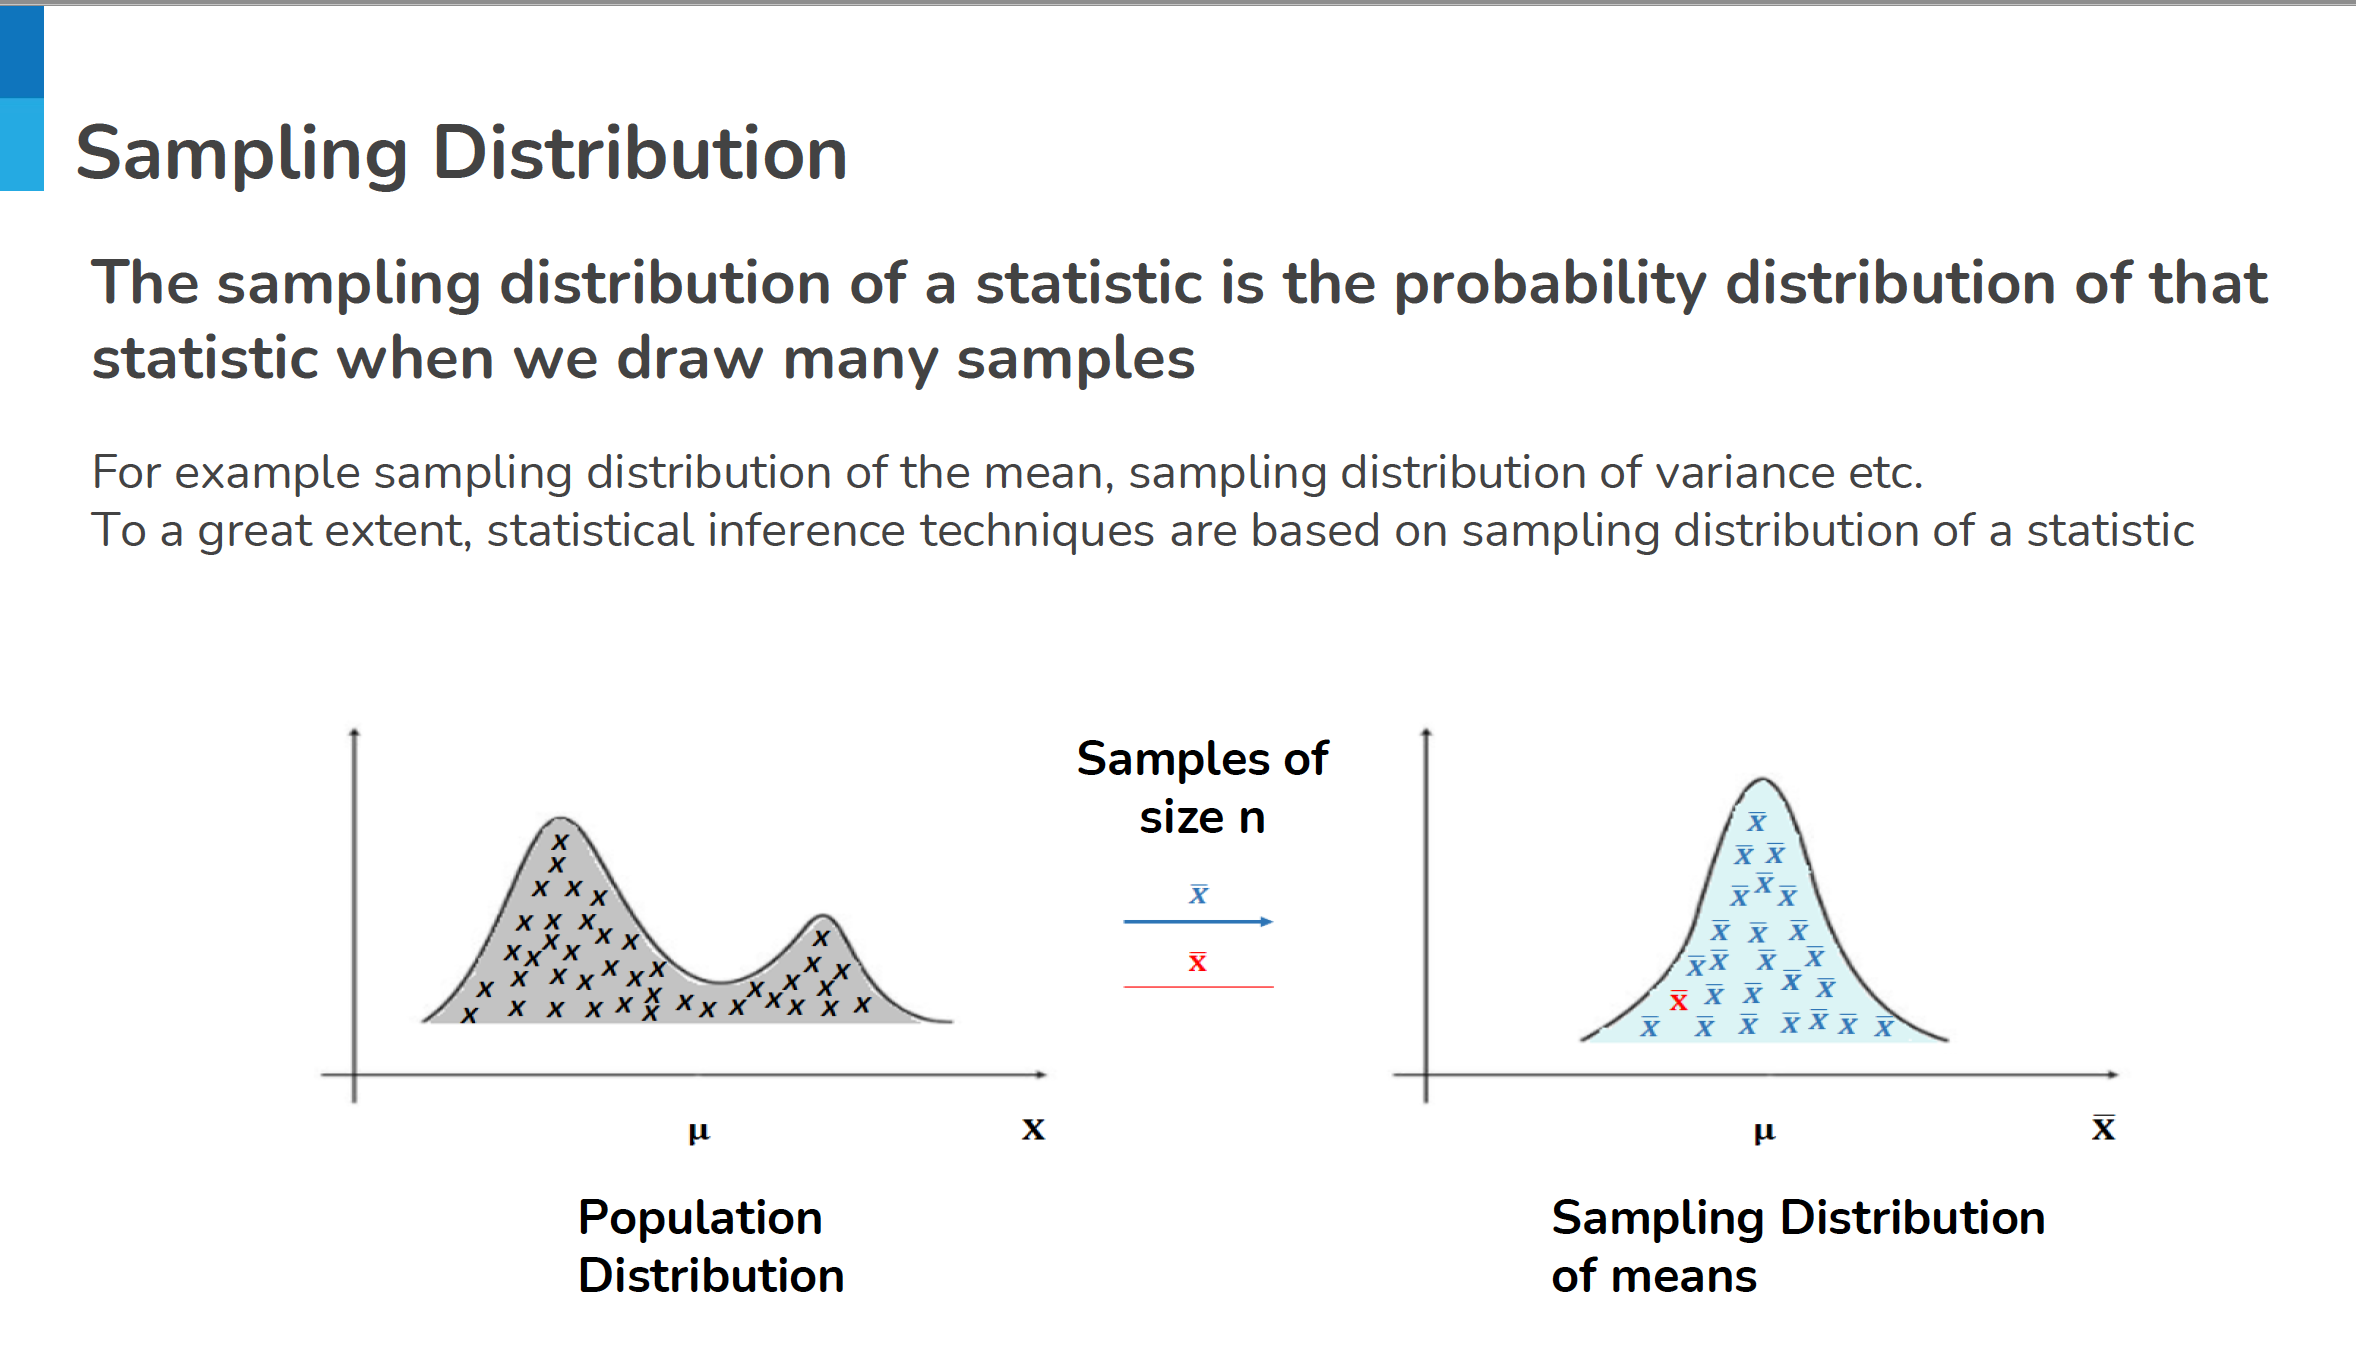

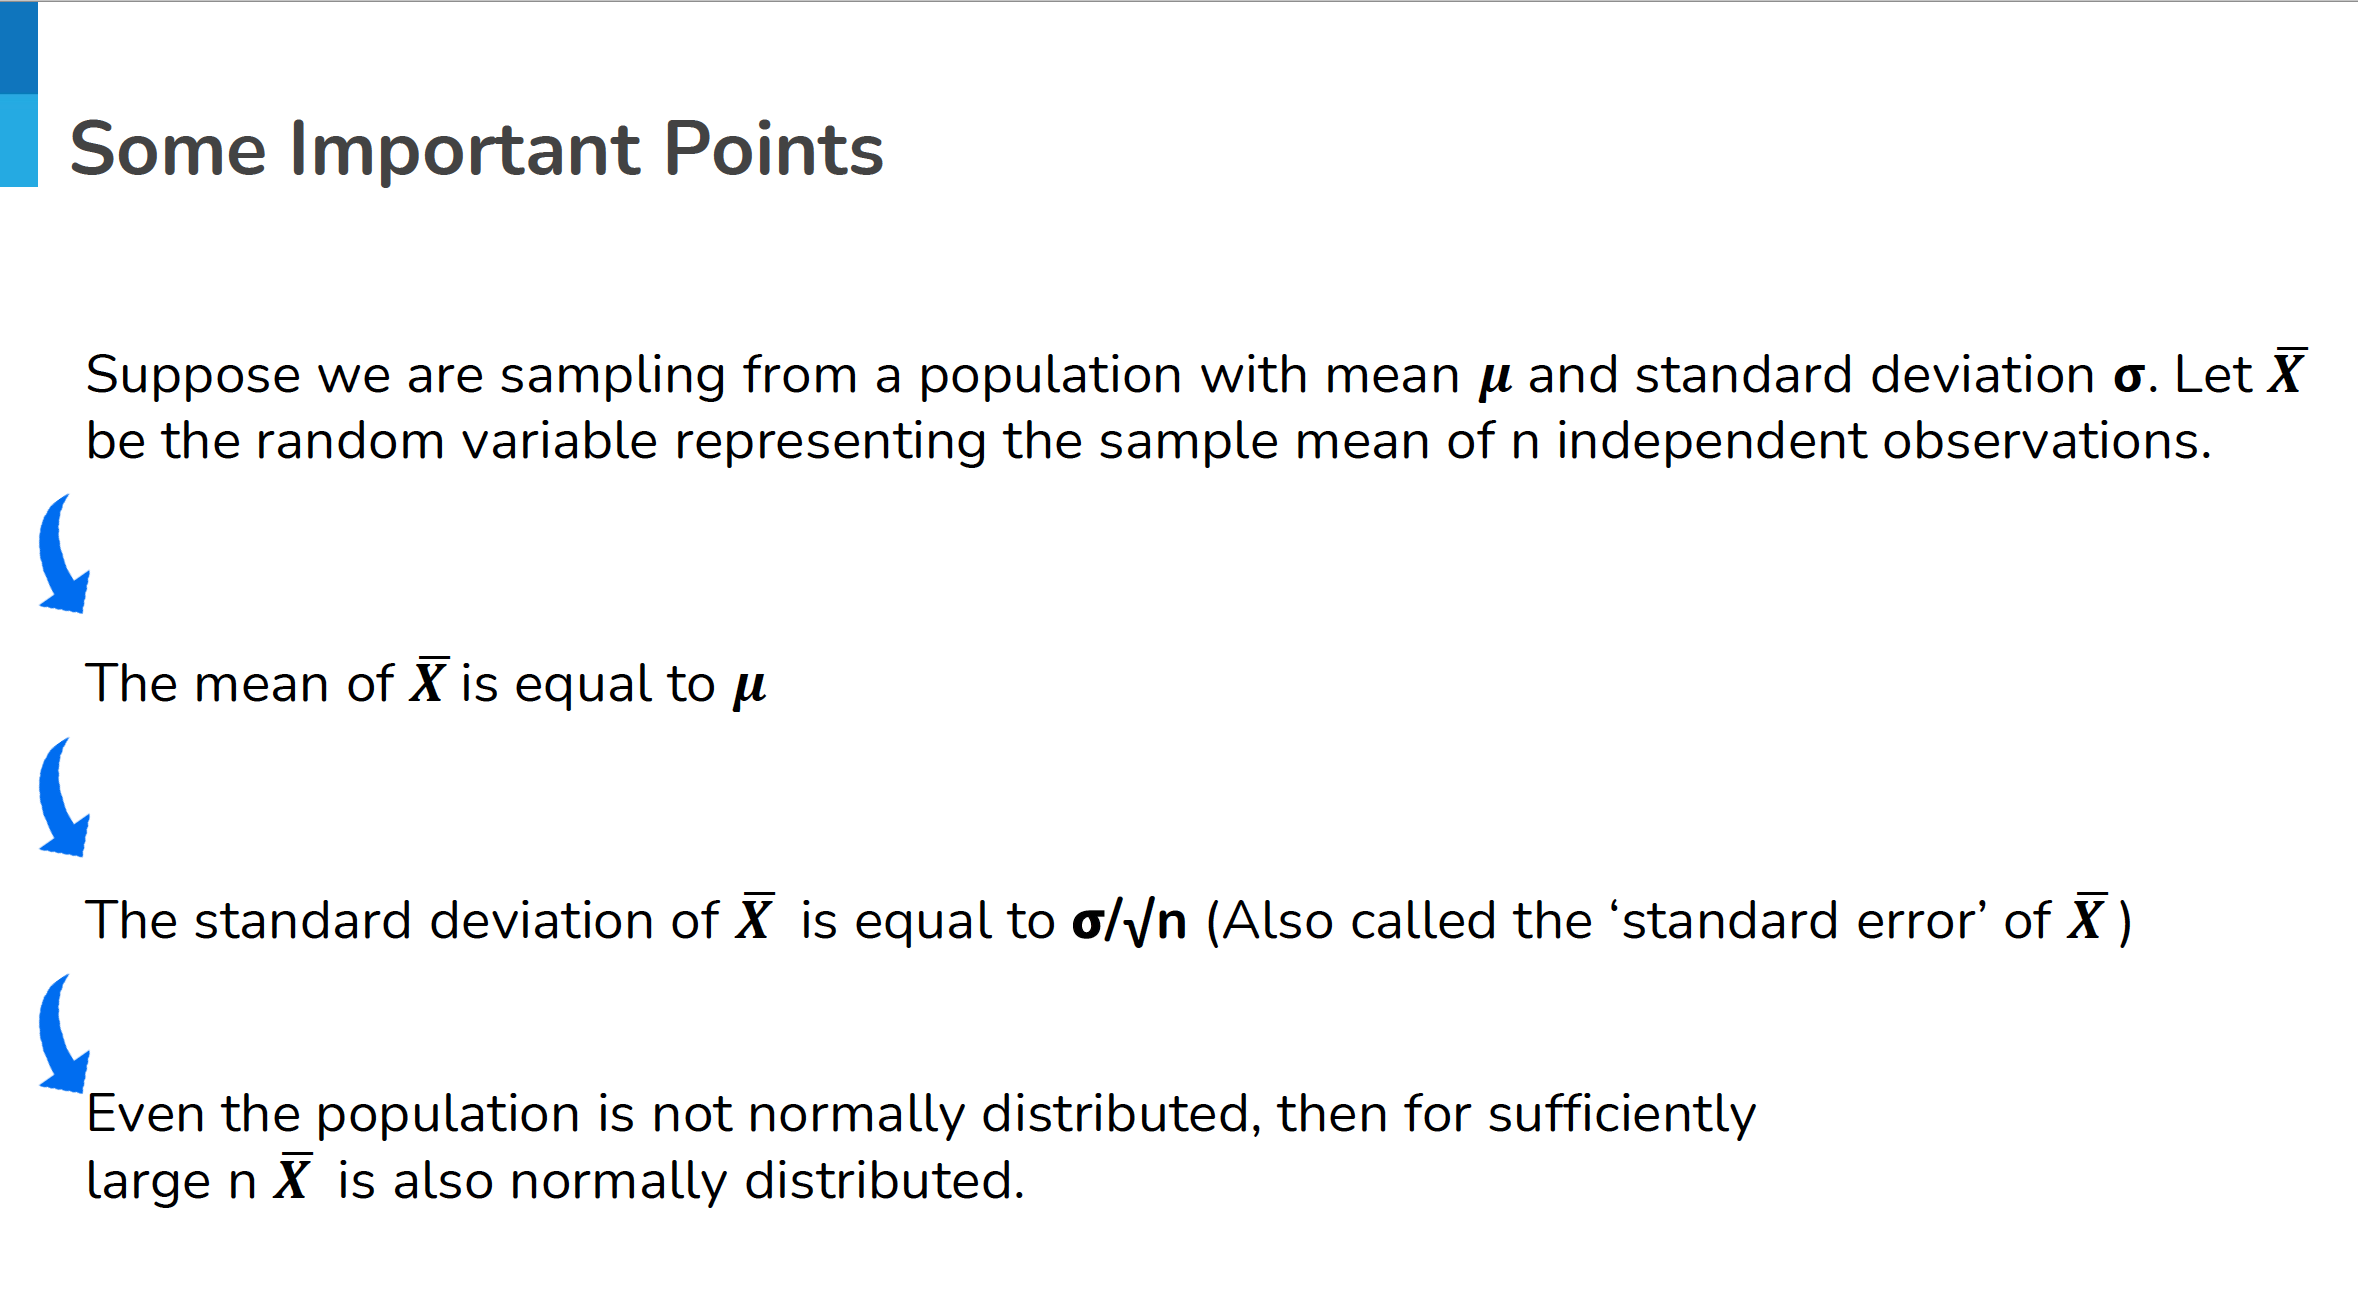

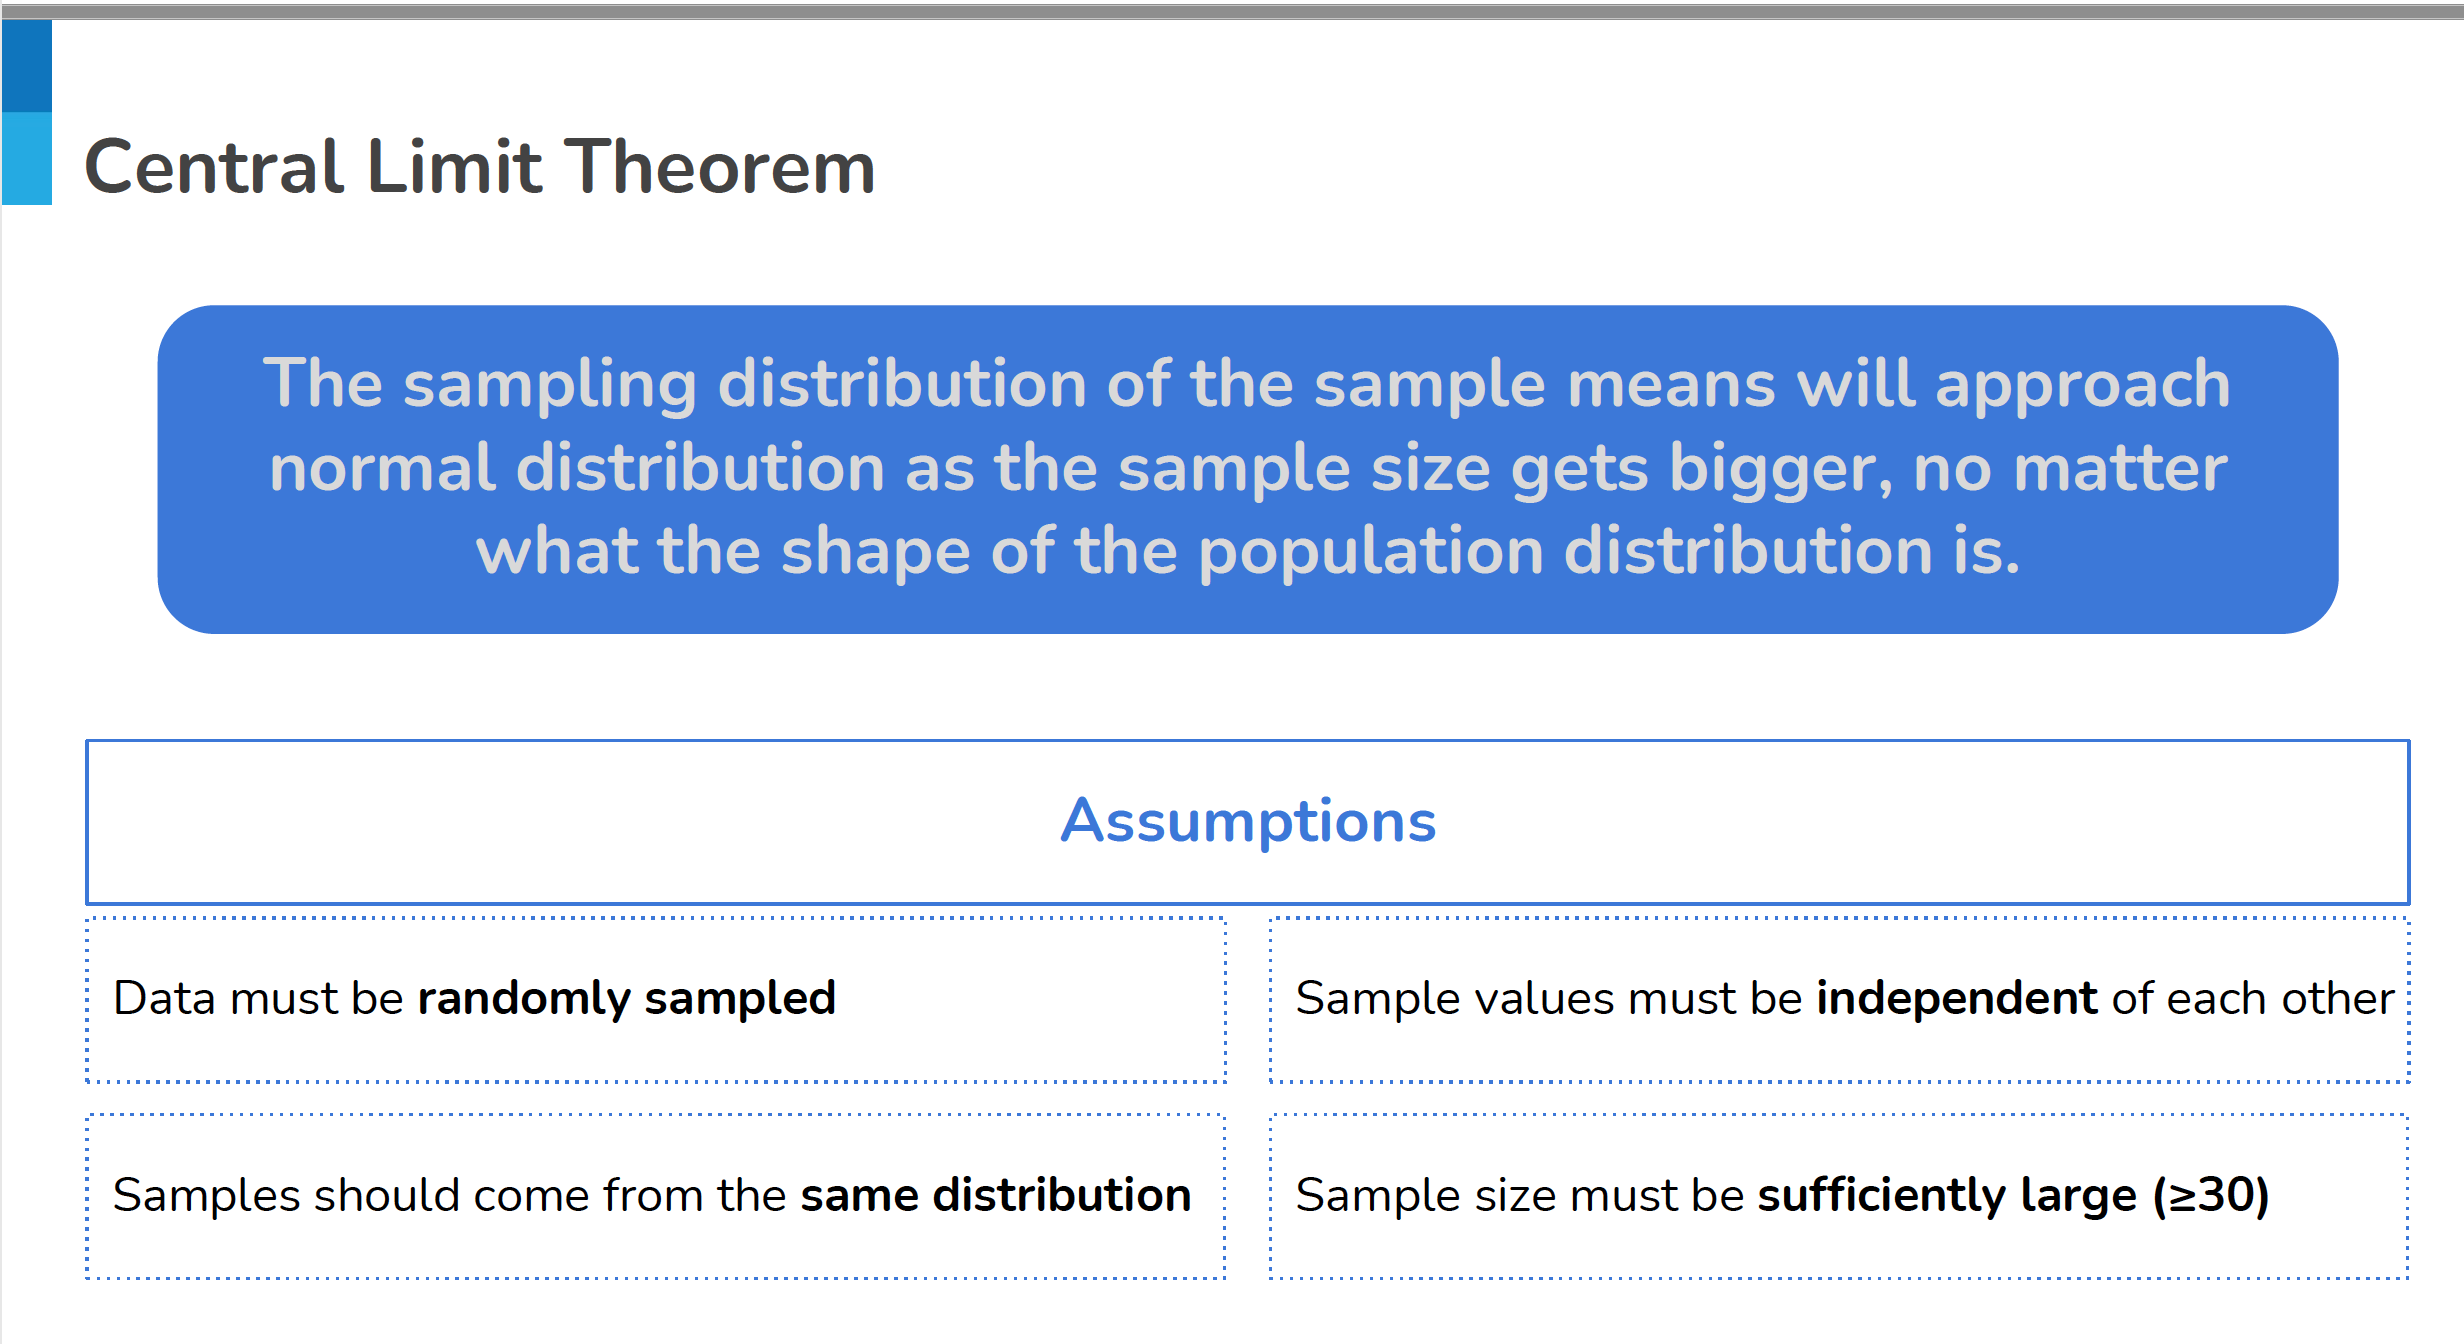

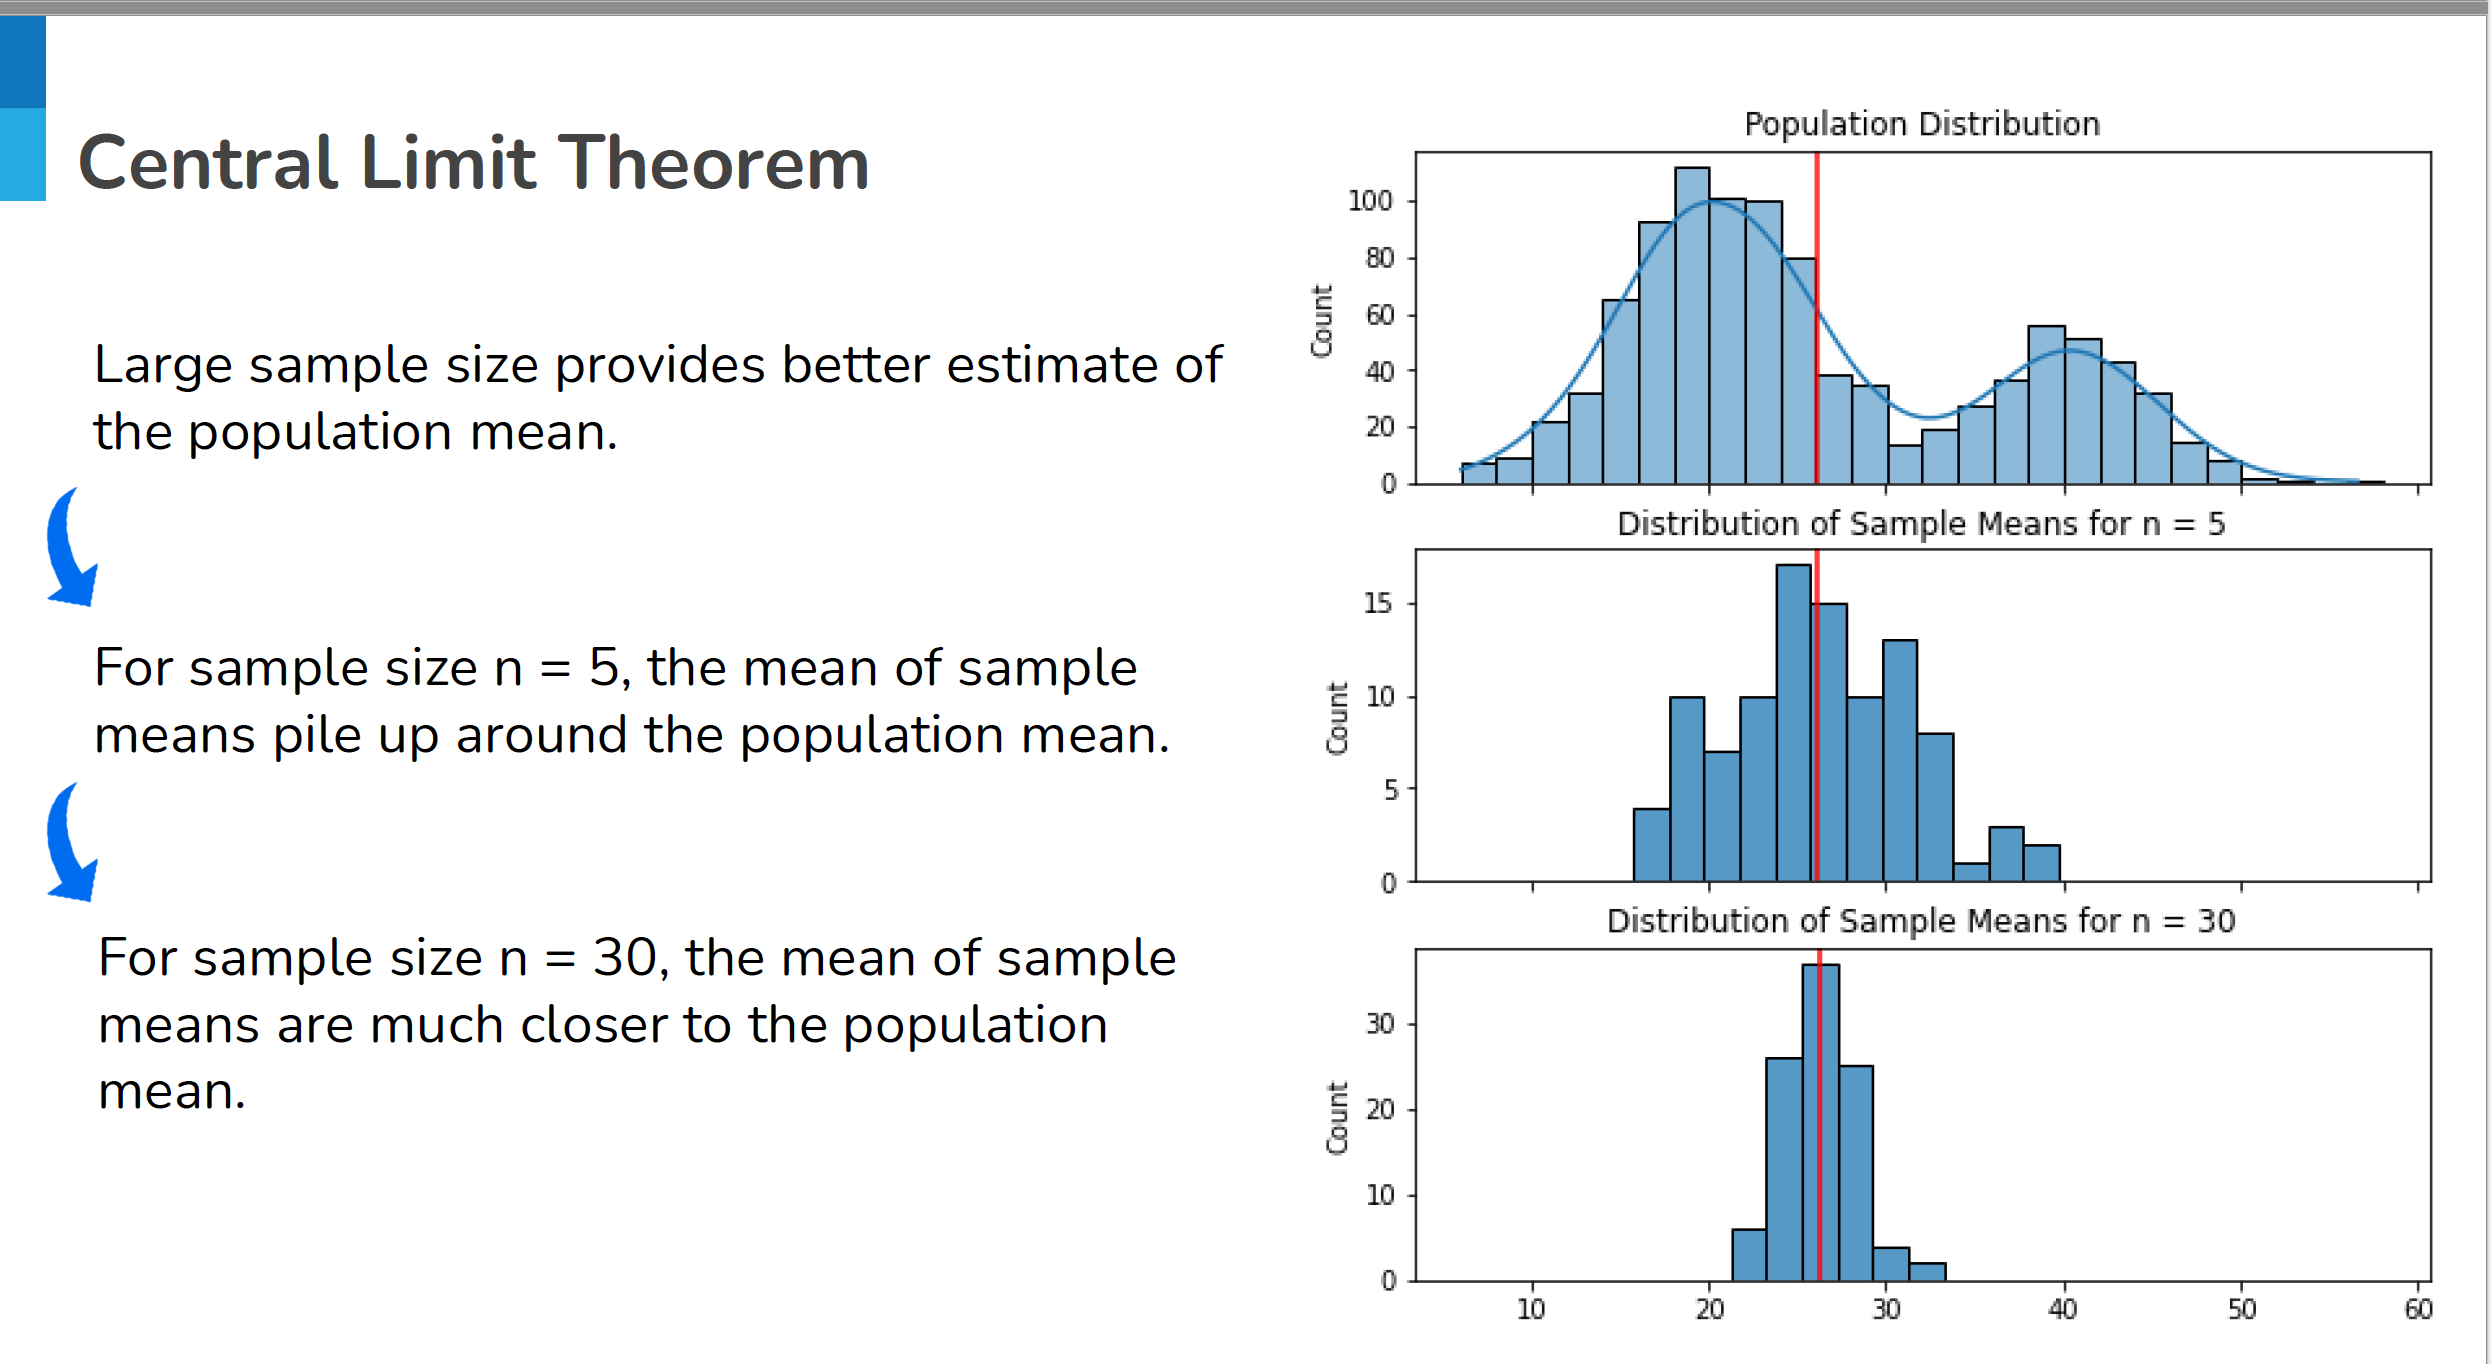

# <a name ='link4'>**Théorème central limite(TCL)**</a>

Le théorème central limite stipule que si nous tirons indépendamment plusieurs échantillons d'une population, prenons la moyenne de chaque échantillon et les traçons (moyennes d'échantillons), alors le tracé tendra vers une distribution normale à mesure que la taille des échantillons augmente, **indépendamment** de la forme de la fonction de distribution de la population.

### Regardons le TCL en action à l'aide d'une simulation python

#### Voici une distribution uniforme (qui n'est certainement *pas normale*)

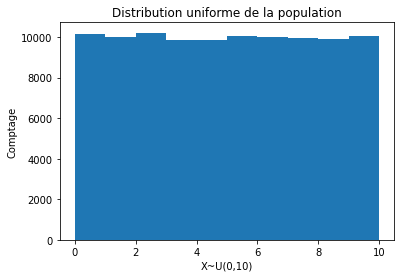

In [ ]:
# Importation de la fonction requise
from scipy.stats import uniform

# la mise en place de la semence pour la reproductibilité
np.random.seed(1)
# créer une population de distribution uniforme de taille 100000
uniform_pop = uniform.rvs(0, 10, size=100000)
# visualiser la distribution uniforme
plt.hist(uniform_pop)
plt.title("Distribution uniforme de la population")
plt.xlabel("X~U(0,10)")
plt.ylabel("Comptage")
plt.show()

#### Créons une distribution d'échantillonnage à partir de cette population (taille d'échantillon = 5, nombre d'échantillons = 500)

* tirer un échantillon de taille 5, donc n=5, on tire 5 observations indépendantes
* obtenir la moyenne de ces 5 observations, c'est-à-dire la moyenne de l'échantillon
* répétez les 2 étapes ci-dessus 500 fois, de sorte que nous obtenons 500 moyennes d'échantillons, où n = 5

Observons maintenant la forme de cette distribution d'échantillonnage.

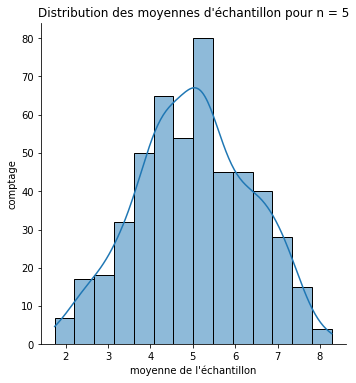

In [ ]:
# jeter les bases de la reproductibilité
np.random.seed(1)
# définir la taille de l'échantillon sur 5
n = 5
# liste pour stocker les moyens d'échantillonnage
sample_means = []
# itérer la boucle pour dessiner plusieurs échantillons
for j in range(500):
    # tirer un échantillon de taille n
    sample = np.random.choice(uniform_pop, size=n)
    # calculer la moyenne de l'échantillon
    sample_mean = np.mean(sample)
    # ajouter la moyenne de l'échantillon à la liste sample_means
    sample_means.append(sample_mean)
# tracer l'histogramme des moyennes d'échantillon
sns.displot(sample_means, kde=True)
plt.title("Distribution des moyennes d'échantillon pour n = " + str(n))
plt.xlabel("moyenne de l'échantillon")
plt.ylabel("comptage")
plt.show()

#### Créons une autre distribution d'échantillonnage à partir de cette population, augmentons la taille de l'échantillon à 15 (n = 15)

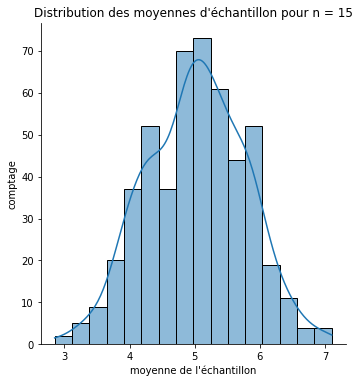

In [ ]:
# jeter les bases de la reproductibilité
np.random.seed(1)
# définir la taille de l'échantillon soit 15
n = 15
# liste pour stocker les moyens d'échantillonnage
sample_means = []
# itérer la boucle pour dessiner plusieurs échantillons
for j in range(500):
    # tirer un échantillon de taille n
    sample = np.random.choice(uniform_pop, size=n)
    # calculer la moyenne de l'échantillon
    sample_mean = np.mean(sample)
    # ajouter la moyenne de l'échantillon à la liste sample_means
    sample_means.append(sample_mean)
# tracer l'histogramme des moyennes d'échantillon
sns.displot(sample_means, kde=True)
plt.title("Distribution des moyennes d'échantillon pour n = " + str(n))
plt.xlabel("moyenne de l'échantillon")
plt.ylabel("comptage")
plt.show()

#### Augmenter la taille de l'échantillon à 30 (n=30)

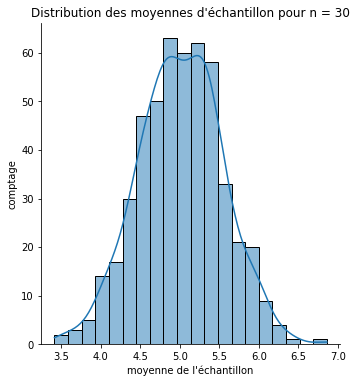

In [ ]:
# jeter les bases de la reproductibilité
np.random.seed(1)
# définir la taille de l'échantillon sur 30
n = 30
# liste pour stocker les moyens d'échantillonnage
sample_means = []
# itérer la boucle pour dessiner plusieurs échantillons
for j in range(500):
    # tirer un échantillon de taille n
    sample = np.random.choice(uniform_pop, size=n)
    # calculer la moyenne de l'échantillon
    sample_mean = np.mean(sample)
    # ajouter la moyenne de l'échantillon à la liste sample_means
    sample_means.append(sample_mean)
# tracer l'histogramme des moyennes d'échantillon
sns.displot(sample_means, kde=True)
plt.title("Distribution des moyennes d'échantillon pour n = " + str(n))
plt.xlabel("moyenne de l'échantillon")
plt.ylabel("comptage")
plt.show()

#### Increase the sample size to 50 (n=50)

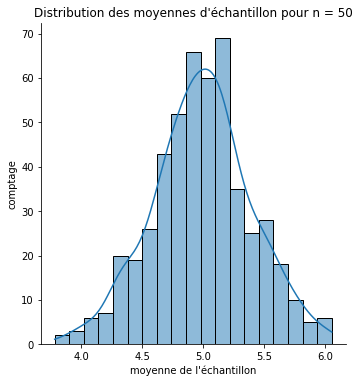

In [ ]:
# jeter les bases de la reproductibilité
np.random.seed(1)
# définir la taille de l'échantillon sur 50
n = 50
# liste pour stocker les moyens d'échantillonnage
sample_means = []
# itérer la boucle pour dessiner plusieurs échantillons
for j in range(500):
    # tirer un échantillon de taille n
    sample = np.random.choice(uniform_pop, size=n)
    # calculer la moyenne de l'échantillon
    sample_mean = np.mean(sample)
    # ajouter la moyenne de l'échantillon à la liste sample_means
    sample_means.append(sample_mean)
# tracer l'histogramme des moyennes d'échantillon
sns.displot(sample_means, kde=True)
plt.title("Distribution des moyennes d'échantillon pour n = " + str(n))
plt.xlabel("moyenne de l'échantillon")
plt.ylabel("comptage")
plt.show()

#### Aperçu

* Observez comment la distribution d'échantillonnage se rapproche de la normalité à mesure que la taille de l'échantillon augmente.

#### Lorsque la distribution de la population est normale

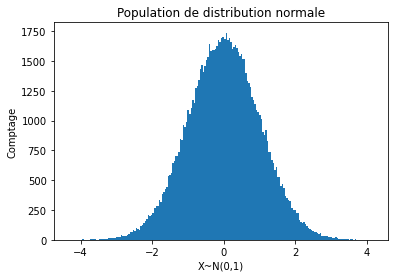

In [ ]:
# importer la fonction requise
from scipy.stats import norm

# jeter les bases de la reproductibilité
np.random.seed(1)
# créer une population de distribution normale de taille 100000
normal_pop = norm.rvs(0, 1, size=100000)
# visualize the normal distribution
plt.hist(normal_pop, 200)
plt.title("Population de distribution normale")
plt.xlabel("X~N(0,1)")
plt.ylabel("Comptage")
plt.show()

#### Créons une distribution d'échantillonnage à partir de cette population (taille d'échantillon = 5, nombre d'échantillons = 500)

* tirer un échantillon de taille 5, donc n=5, on tire 5 observations indépendantes
* obtenir la moyenne de ces 5 observations, c'est-à-dire la moyenne de l'échantillon
* répétez les 2 étapes ci-dessus 500 fois, de sorte que nous obtenons 500 moyennes d'échantillons, où n = 5

Observons maintenant la forme de cette distribution d'échantillonnage.

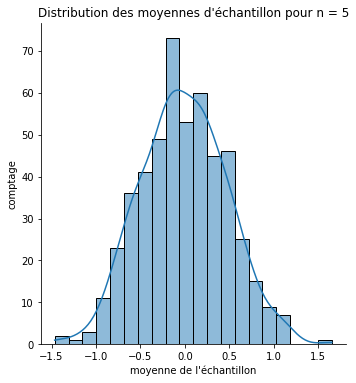

In [ ]:

# jeter les bases de la reproductibilité
np.random.seed(1)
# définir la taille de l'échantillon sur 5
n = 5
# liste pour stocker les moyens d'échantillonnage
sample_means = []
# itérer la boucle pour dessiner plusieurs échantillons
for j in range(500):
    # tirer un échantillon de taille n
    sample = np.random.choice(normal_pop, size=n)
    # calculer la moyenne de l'échantillon
    sample_mean = np.mean(sample)
    # ajouter la moyenne de l'échantillon à la liste sample_means
    sample_means.append(sample_mean)
# tracer l'histogramme des moyennes d'échantillon
sns.displot(sample_means, kde=True)
plt.title("Distribution des moyennes d'échantillon pour n = " + str(n))
plt.xlabel("moyenne de l'échantillon")
plt.ylabel("comptage")
plt.show()


#### Aperçu

* Lorsque la distribution de la population est normale, la distribution d'échantillonnage est proche de la normale, même pour les plus petites tailles d'échantillonnage comme n = 5

#### Vérifions la distribution d'échantillonnage pour la taille d'échantillon n = 15

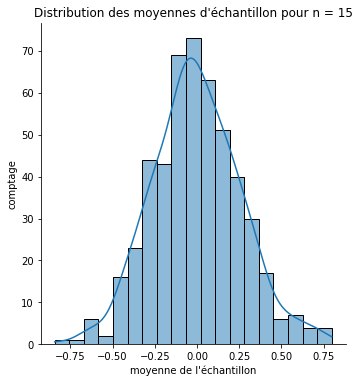

In [ ]:
# jeter les bases de la reproductibilité
np.random.seed(1)
# définir la taille de l'échantillon sur 15
n = 15
# liste pour stocker les moyens d'échantillonnage
sample_means = []
# itérer la boucle pour dessiner plusieurs échantillons
for j in range(500):
    # tirer un échantillon de taille n
    sample = np.random.choice(normal_pop, size=n)
    # calculer la moyenne de l'échantillon
    sample_mean = np.mean(sample)
    # ajouter la moyenne de l'échantillon à la liste sample_means
    sample_means.append(sample_mean)
# tracer l'histogramme des moyennes d'échantillon
sns.displot(sample_means, kde=True)
plt.title("Distribution des moyennes d'échantillon pour n = " + str(n))
plt.xlabel("moyenne de l'échantillon")
plt.ylabel("comptage")
plt.show()

#### Sampling Distribution when Sample Size n = 30



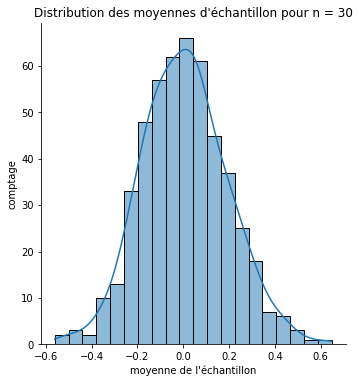

In [ ]:
# jeter les bases de la reproductibilité
np.random.seed(1)
# définir la taille de l'échantillon sur 30
n = 30
# liste pour stocker les moyens d'échantillonnage
sample_means = []
# itérer la boucle pour dessiner plusieurs échantillons
for j in range(500):
    # tirer un échantillon de taille n
    sample = np.random.choice(normal_pop, size=n)
    # calculer la moyenne de l'échantillon
    sample_mean = np.mean(sample)
    # ajouter la moyenne de l'échantillon à la liste sample_means
    sample_means.append(sample_mean)
# tracer l'histogramme des moyennes d'échantillon
sns.displot(sample_means, kde=True)
plt.title("Distribution des moyennes d'échantillon pour n = " + str(n))
plt.xlabel("moyenne de l'échantillon")
plt.ylabel("comptage")
plt.show()

#### Voyons si le CLT fonctionne si la distribution de la population est une distribution exponentielle (qui encore une fois n'est clairement * pas normale *)

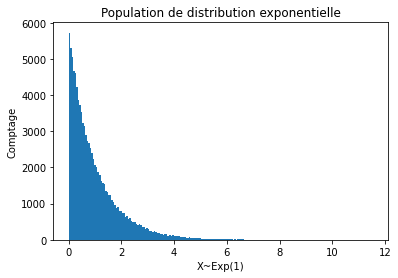

In [ ]:
# importation de la fonction requise
from scipy.stats import expon

# jeter les bases de la reproductibilité
np.random.seed(1)
# créer une population de distribution exponentielle de taille 100000
exp_pop = expon.rvs(size=100000)
# visualiser la distribution exponentielle
plt.hist(exp_pop, 200)
plt.title("Population de distribution exponentielle")
plt.xlabel("X~Exp(1)")
plt.ylabel("Comptage")
plt.show()

#### Sampling Distribution for Sample Size n = 5

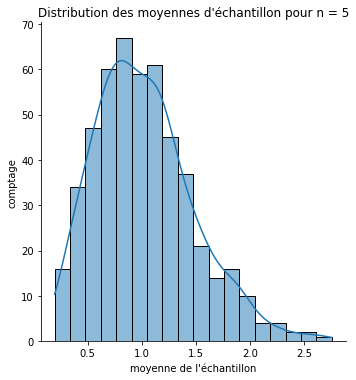

In [ ]:
# jeter les bases de la reproductibilité
np.random.seed(1)
# définir la taille de l'échantillon sur 5
n = 5
# liste pour stocker les moyens d'échantillonnage
sample_means = []
# itérer la boucle pour dessiner plusieurs échantillons
for j in range(500):
    # tirer un échantillon de taille n
    sample = np.random.choice(exp_pop, size=n)
    # calculer la moyenne de l'échantillon
    sample_mean = np.mean(sample)
    # ajouter la moyenne de l'échantillon à la liste sample_means
    sample_means.append(sample_mean)
# tracer l'histogramme des moyennes d'échantillon
sns.displot(sample_means, kde=True)
plt.title("Distribution des moyennes d'échantillon pour n = " + str(n))
plt.xlabel("moyenne de l'échantillon")
plt.ylabel("comptage")
plt.show()


#### Sampling Distribution for Sample Size n = 15

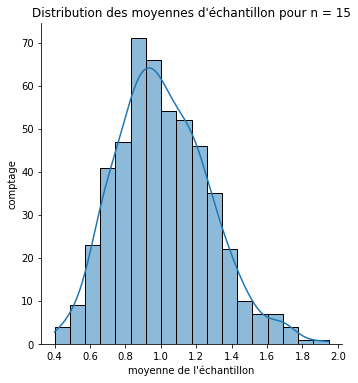

In [ ]:
# jeter les bases de la reproductibilité
np.random.seed(1)
# définir la taille de l'échantillon sur 15
n = 15
# liste pour stocker les moyens d'échantillonnage
sample_means = []
# itérer la boucle pour dessiner plusieurs échantillons
for j in range(500):
    # tirer un échantillon de taille n
    sample = np.random.choice(exp_pop, size=n)
    # calculer la moyenne de l'échantillon
    sample_mean = np.mean(sample)
    # ajouter la moyenne de l'échantillon à la liste sample_means
    sample_means.append(sample_mean)
# tracer l'histogramme des moyennes d'échantillon
sns.displot(sample_means, kde=True)
plt.title("Distribution des moyennes d'échantillon pour n = " + str(n))
plt.xlabel("moyenne de l'échantillon")
plt.ylabel("comptage")
plt.show()

#### Distribution d'échantillonnage pour la taille de l'échantillon n = 30

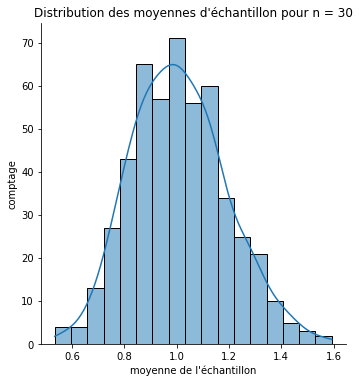

In [ ]:
# jeter les bases de la reproductibilité
np.random.seed(1)
# définir la taille de l'échantillon sur 30
n = 30
# liste pour stocker les moyens d'échantillonnage
sample_means = []
# itérer la boucle pour dessiner plusieurs échantillons
for j in range(500):
    # tirer un échantillon de taille n
    sample = np.random.choice(exp_pop, size=n)
    # calculer la moyenne de l'échantillon
    sample_mean = np.mean(sample)
    # ajouter la moyenne de l'échantillon à la liste sample_means
    sample_means.append(sample_mean)
# tracer l'histogramme des moyennes d'échantillon
sns.displot(sample_means, kde=True)
plt.title("Distribution des moyennes d'échantillon pour n = " + str(n))
plt.xlabel("moyenne de l'échantillon")
plt.ylabel("comptage")
plt.show()

#### Sampling Distribution for Sample Size n = 50

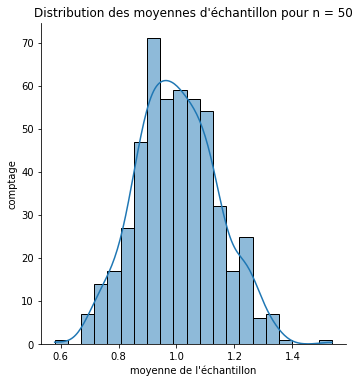

In [ ]:
# jeter les bases de la reproductibilité
np.random.seed(1)
# définir la taille de l'échantillon sur 50
n = 50
# liste pour stocker les moyens d'échantillonnage
sample_means = []
# itérer la boucle pour dessiner plusieurs échantillons
for j in range(500):
    # tirer un échantillon de taille n
    sample = np.random.choice(exp_pop, size=n)
    # calculer la moyenne de l'échantillon
    sample_mean = np.mean(sample)
    # ajouter la moyenne de l'échantillon à la liste sample_means
    sample_means.append(sample_mean)
# tracer l'histogramme des moyennes d'échantillon
sns.displot(sample_means, kde=True)
plt.title("Distribution des moyennes d'échantillon pour n = " + str(n))
plt.xlabel("moyenne de l'échantillon")
plt.ylabel("comptage")
plt.show()

### Notions Clés à retenir

* Nous avons essayé différentes distributions pour simuler l'idée fondamentale du TCL. Nous pouvons voir que quelle que soit la forme de la distribution de la population, le tracé des moyennes d'échantillons tend approximativement vers une distribution normale à mesure que la taille de l'échantillon augmente.

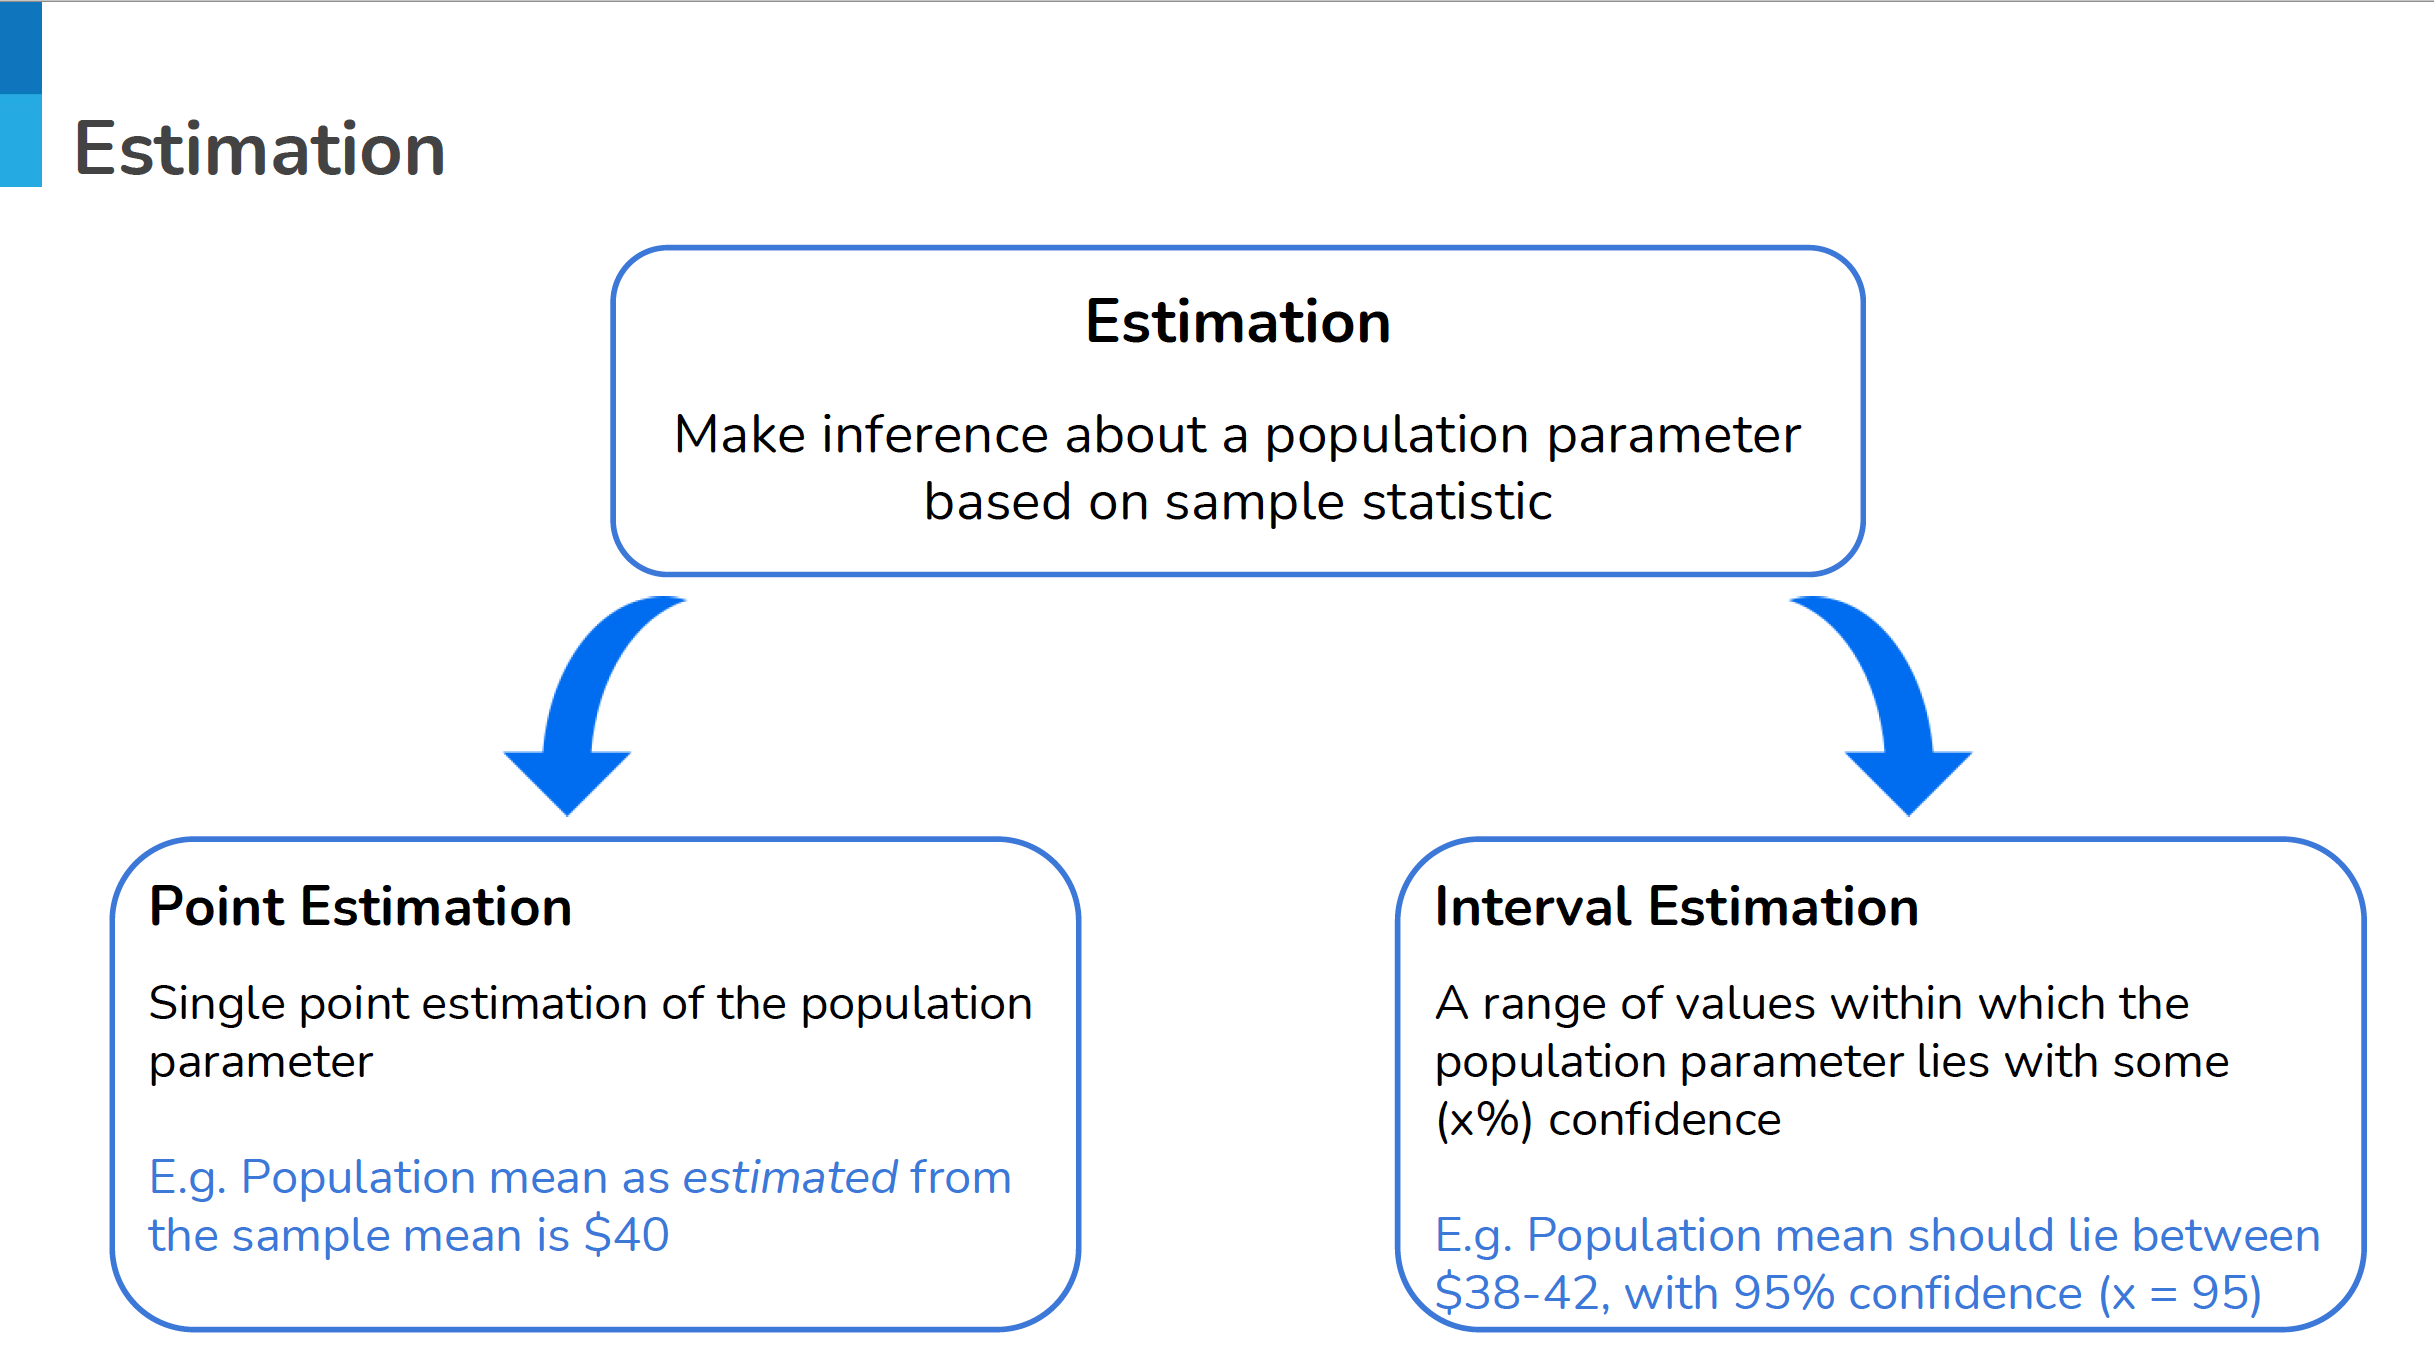

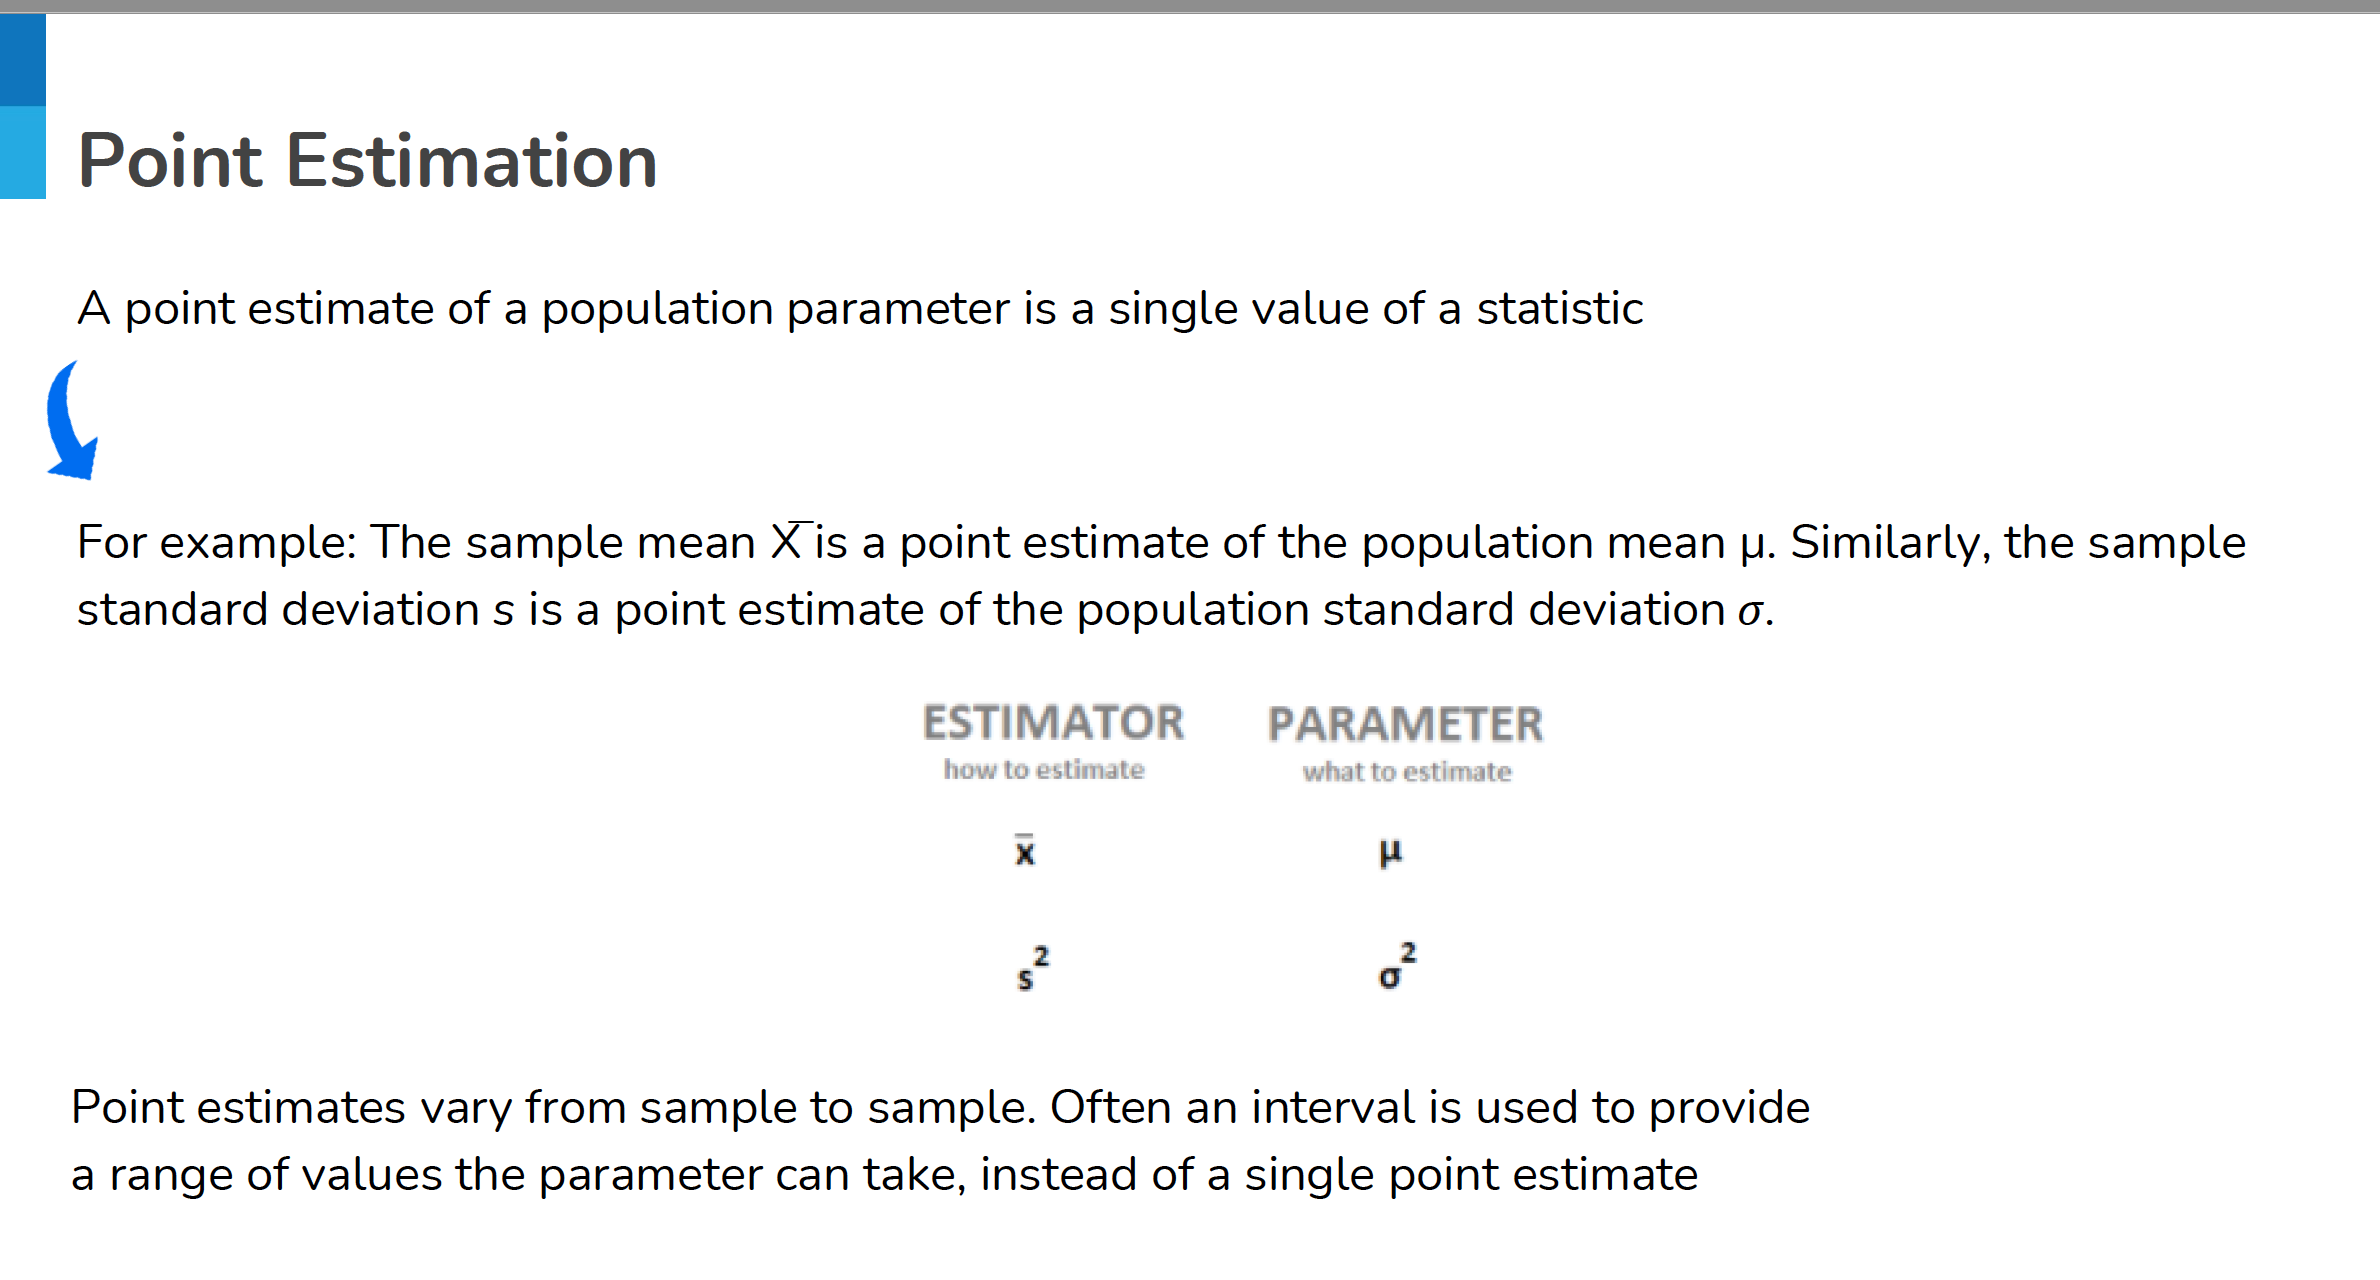

# <a name='link5'>**Estimation ponctuelle**</a>

#### Voyons comment la moyenne de la population est estimée par la moyenne de l'échantillon

Une organisation à but non lucratif a échantillonné les dossiers du service forestier local pour trouver les montants suivants (en milliers de dollars) de dommages pour 10 incendies de forêt :

120, 55, 60, 10, 8, 150, 44, 58, 62, 123

Quelle est l'estimation du montant moyen des dommages causés par les incendies de forêt, dans cette zone ?

In [ ]:
# obtenir un échantillon
echantillon = np.array([120, 55, 60, 10, 8, 150, 44, 58, 62, 123])

# trouver la moyenne de l'échantillon
x_bar = np.mean(echantillon)
x_bar

69.0

#### Aperçu
* L'estimation du montant moyen des dommages causés par les incendies de forêt dans cette région est de 69 000 $.

Habituellement, l'estimation ponctuelle d'un paramètre de population inconnu est la statistique d'échantillon correspondante.

Par exemple:

a. La moyenne de la population μ est estimée par la moyenne de l'échantillon x̅.

b. La médiane de la population est estimée par la médiane de l'échantillon x̃.

c. La proportion de succès π de la population est estimée par la proportion de succès p de l'échantillon.

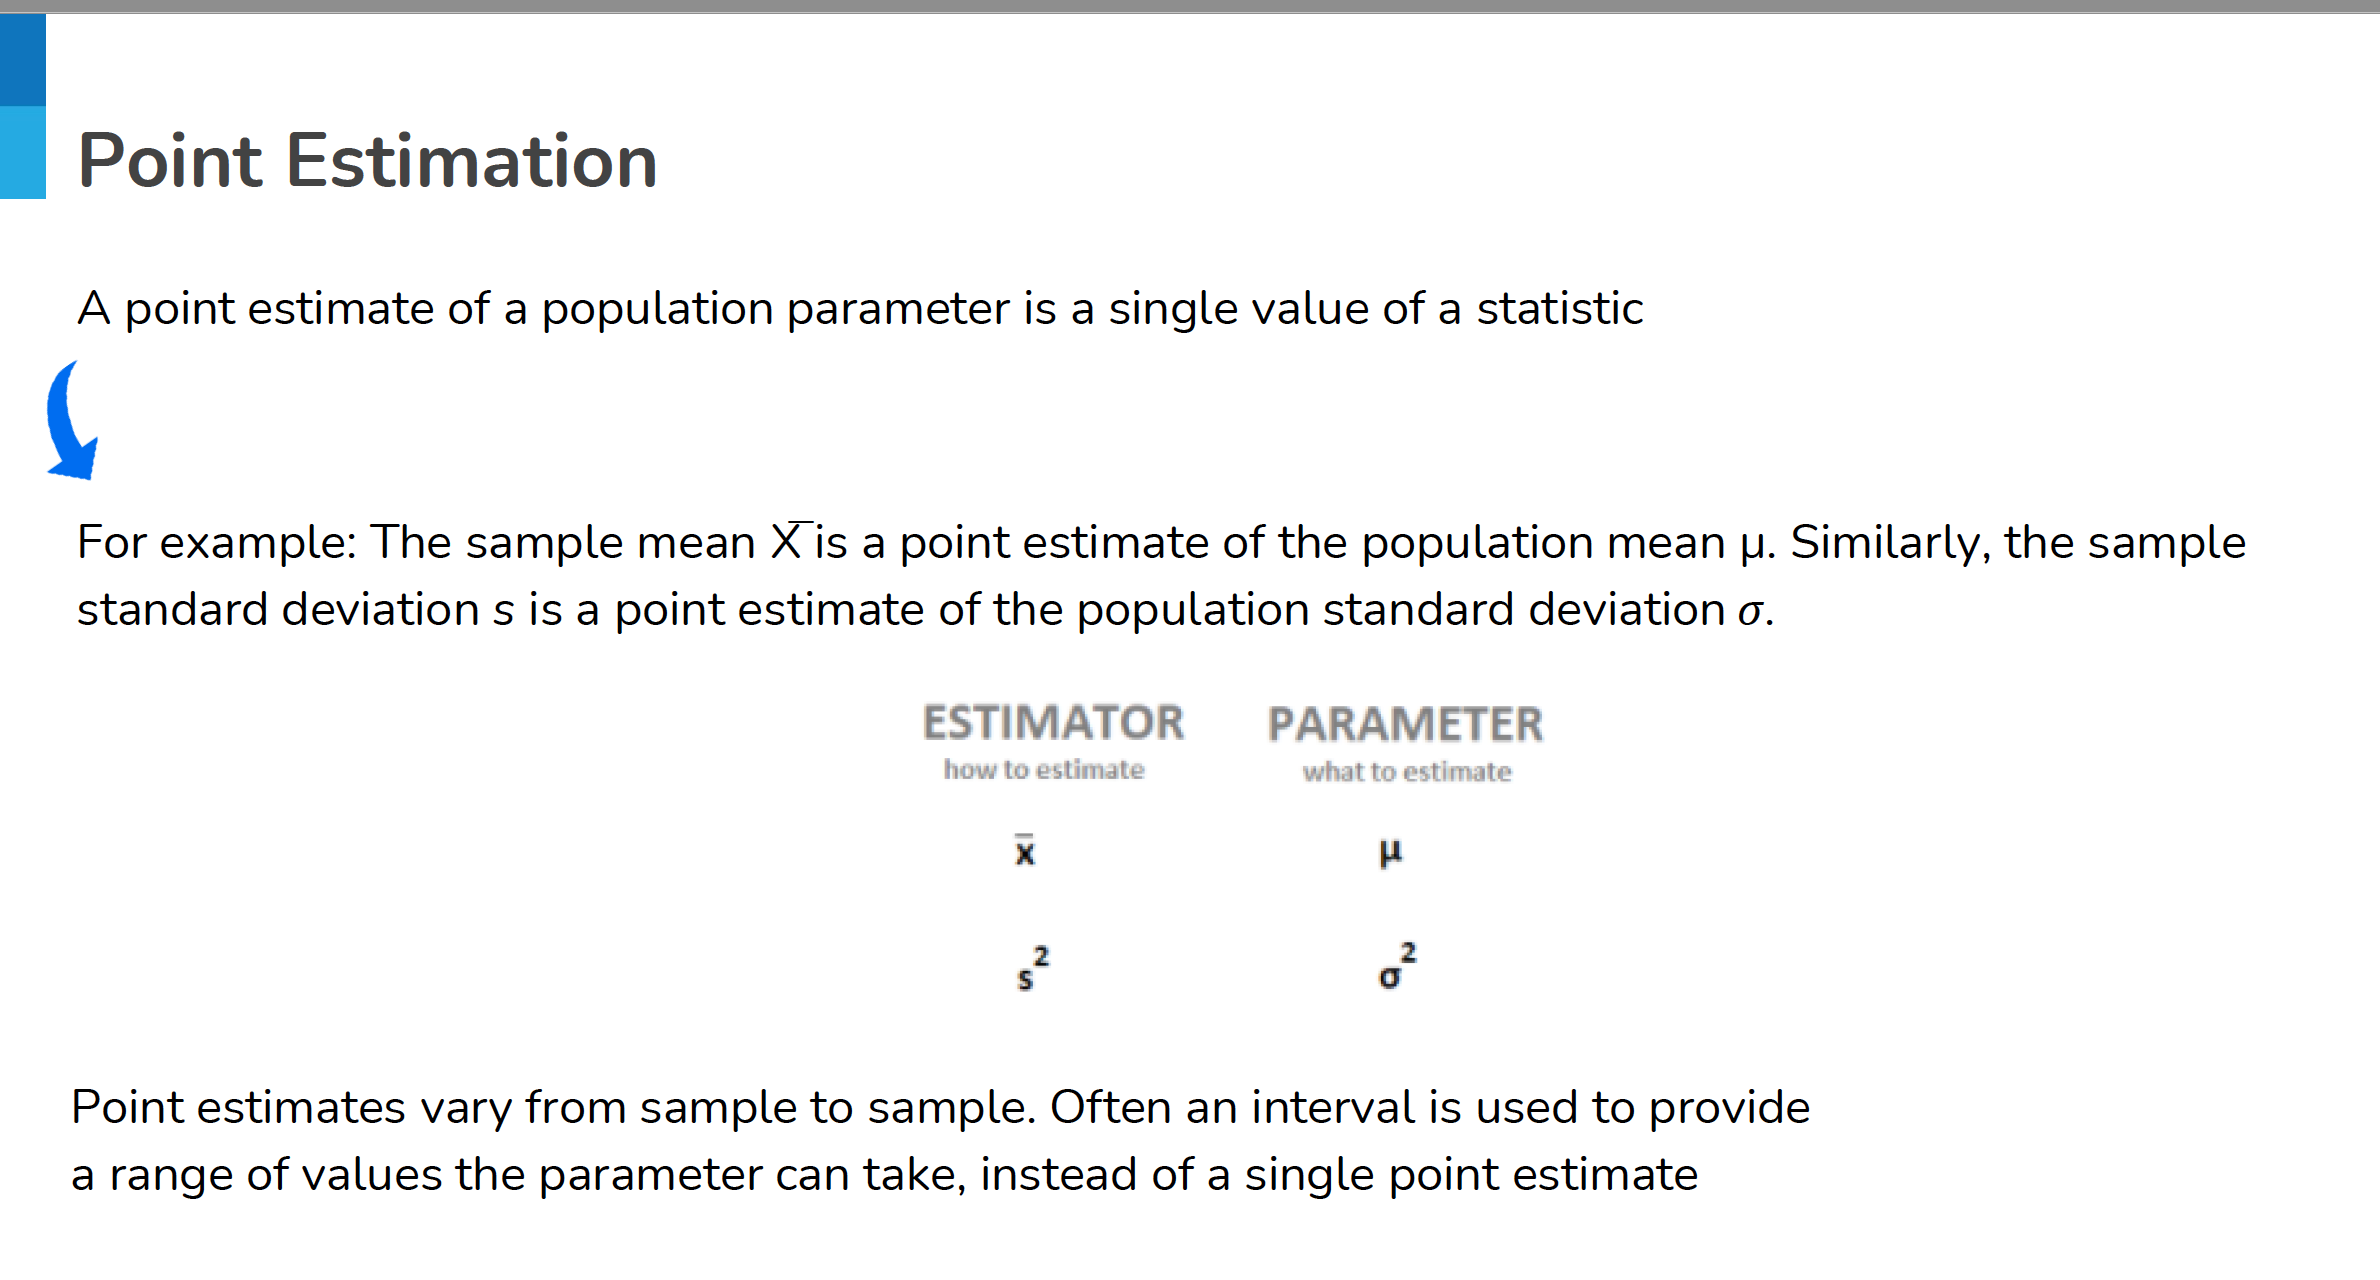

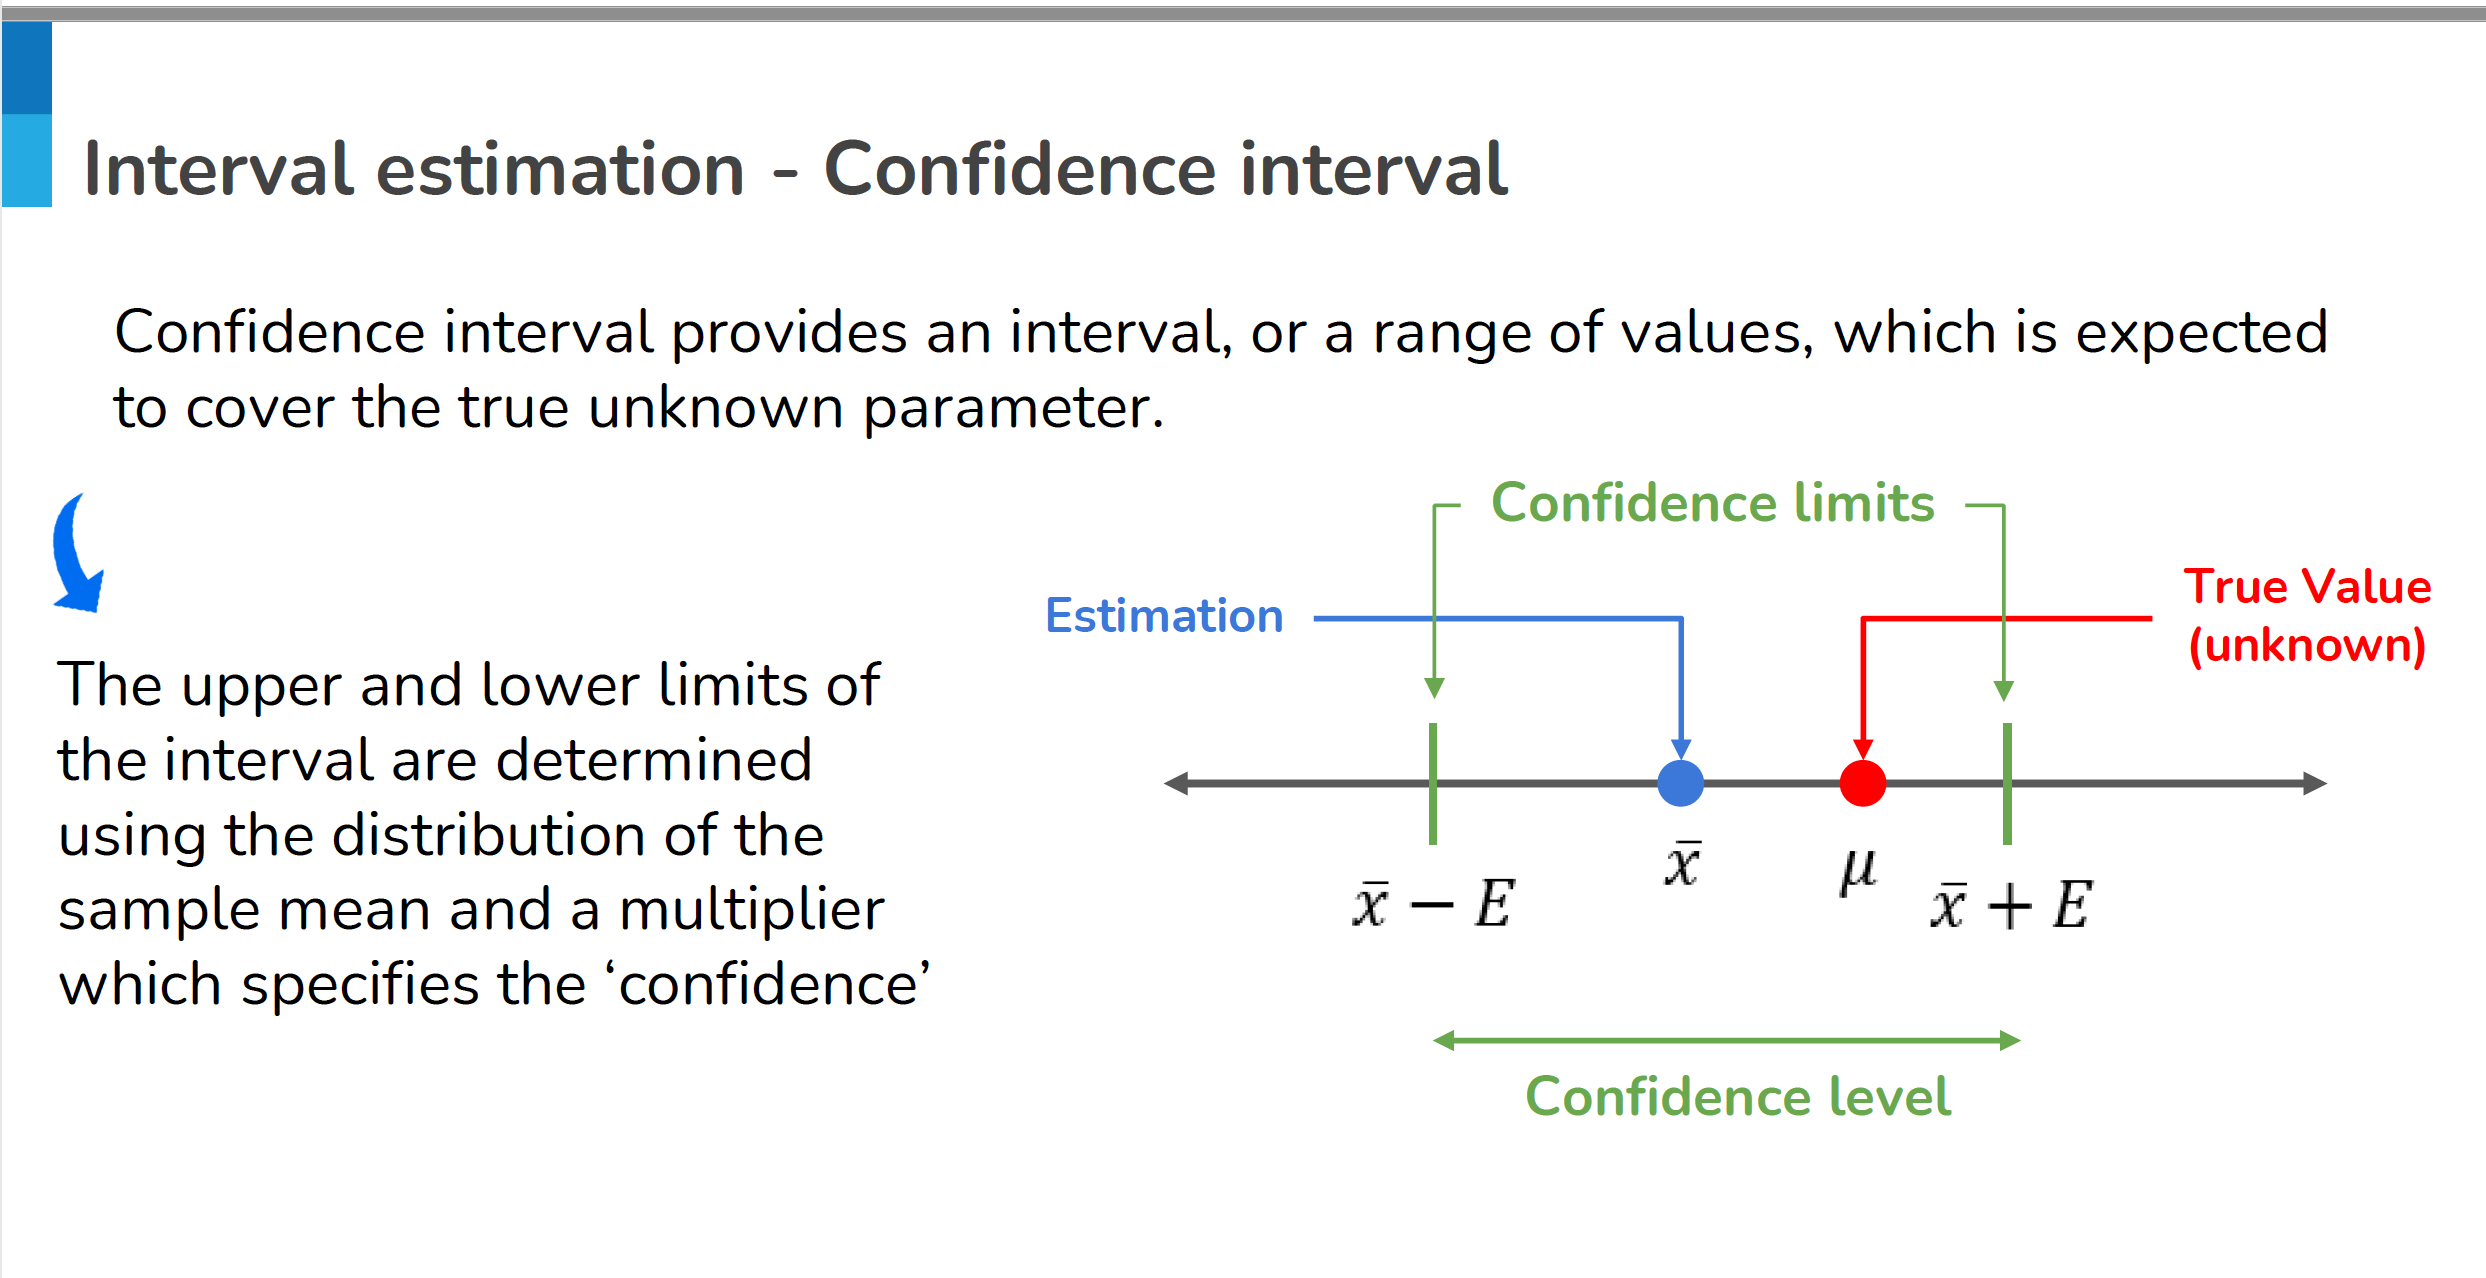

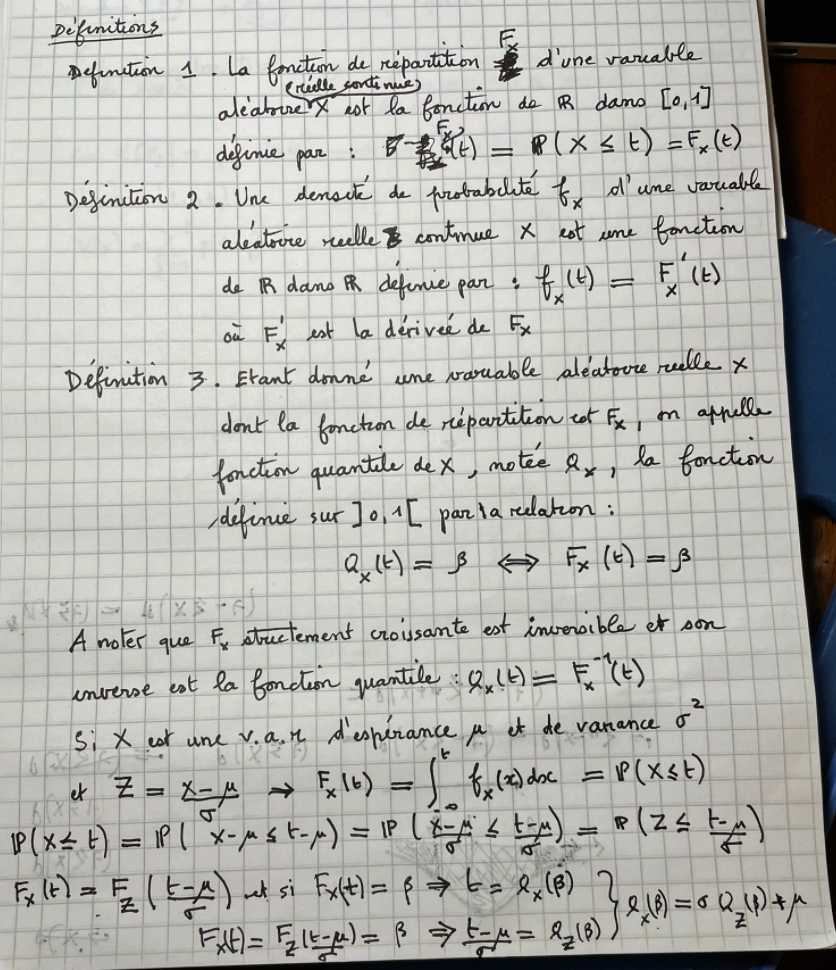

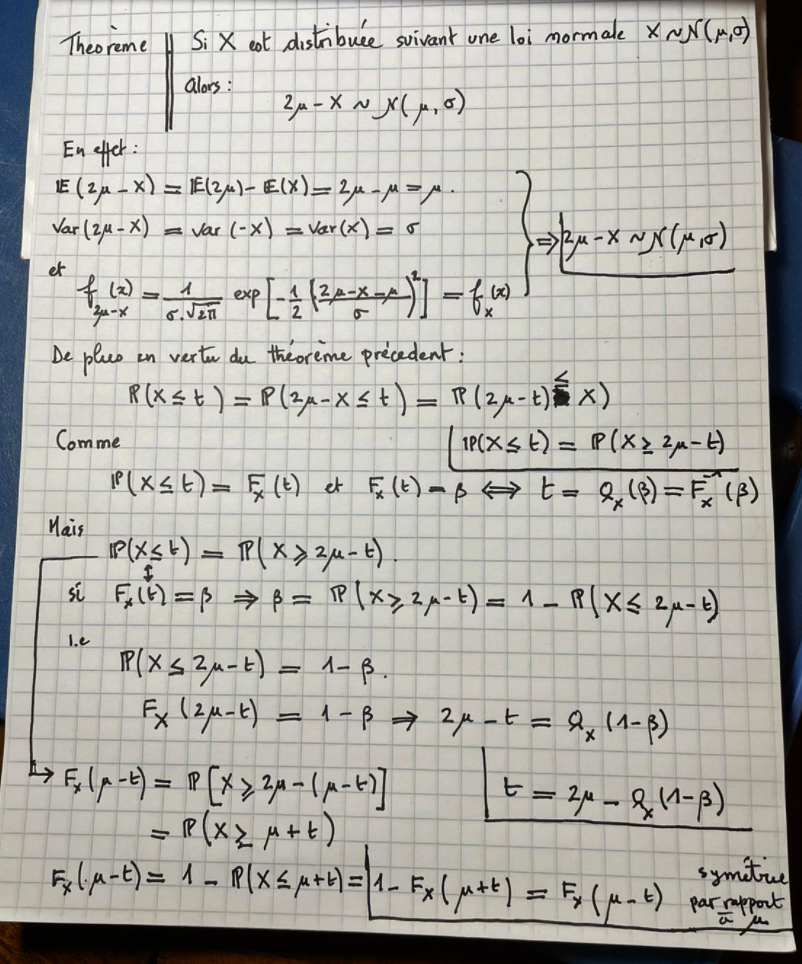

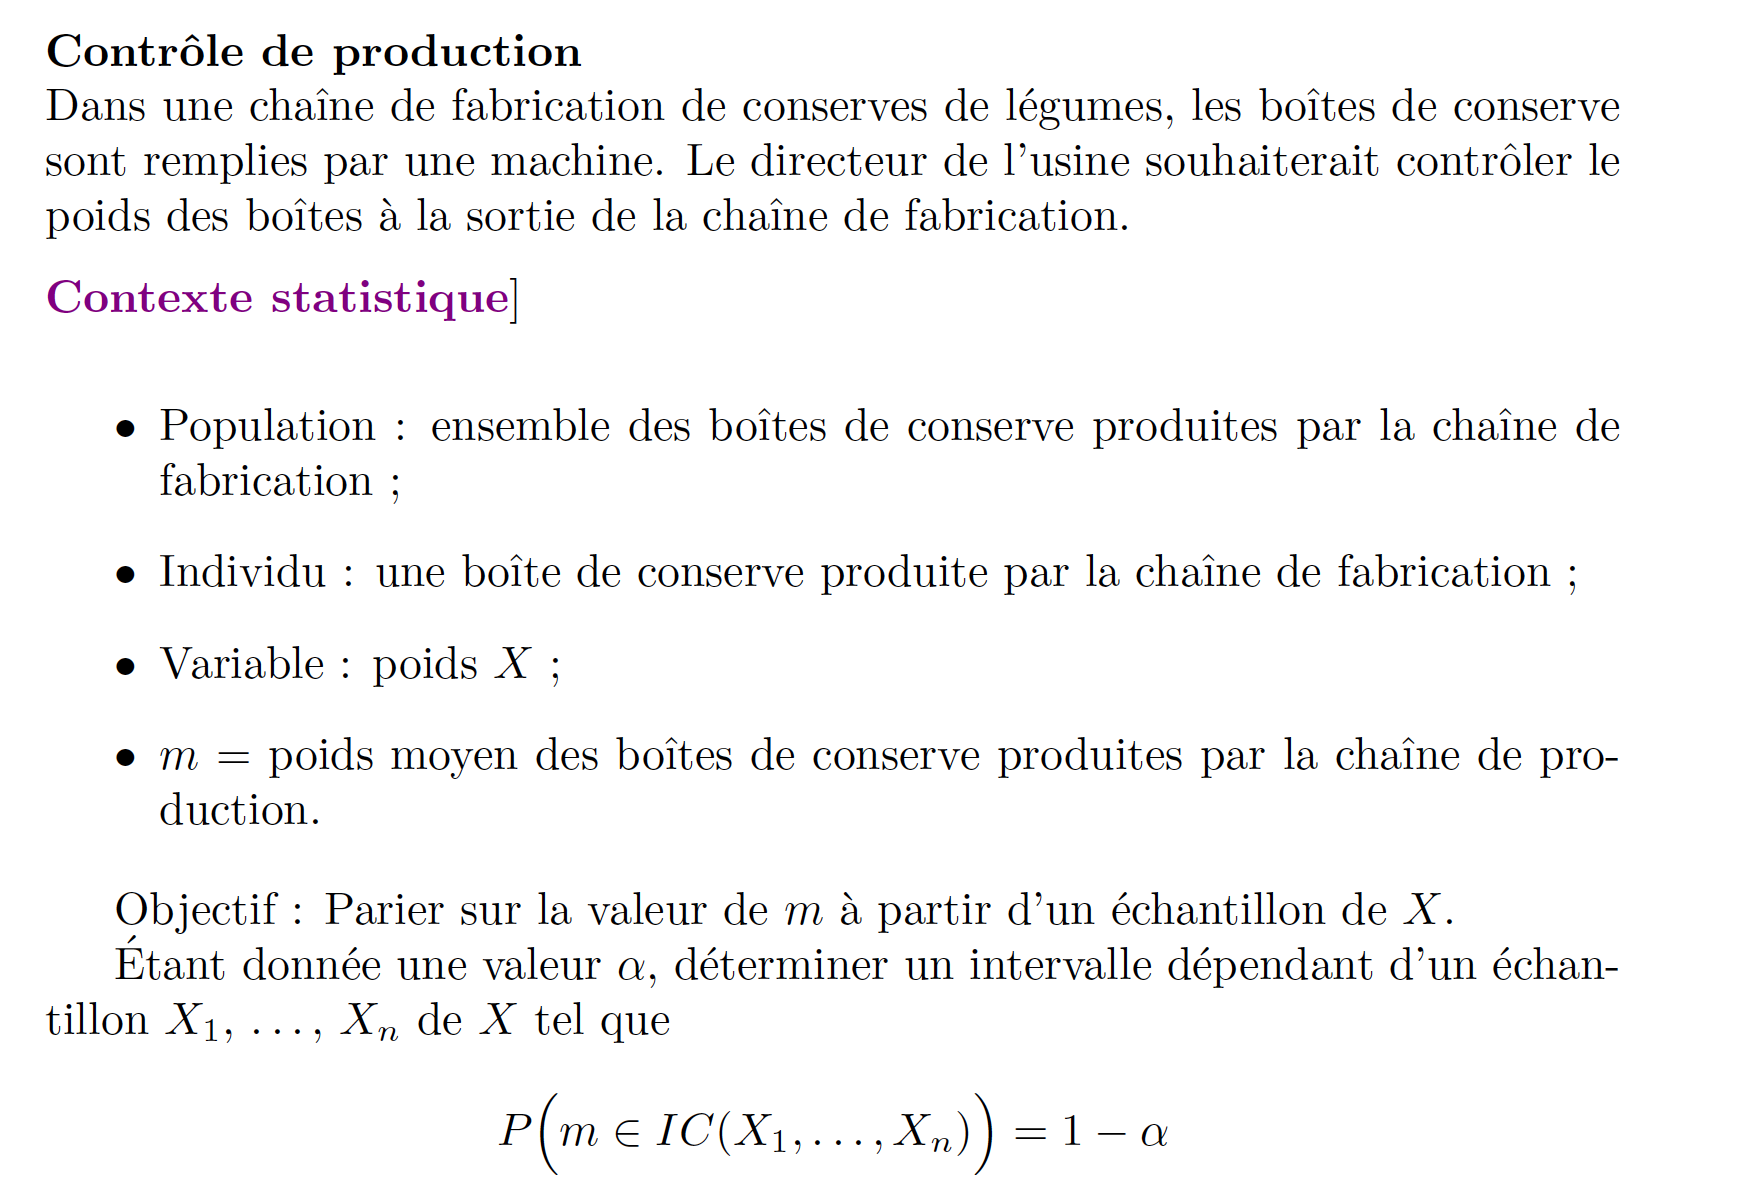

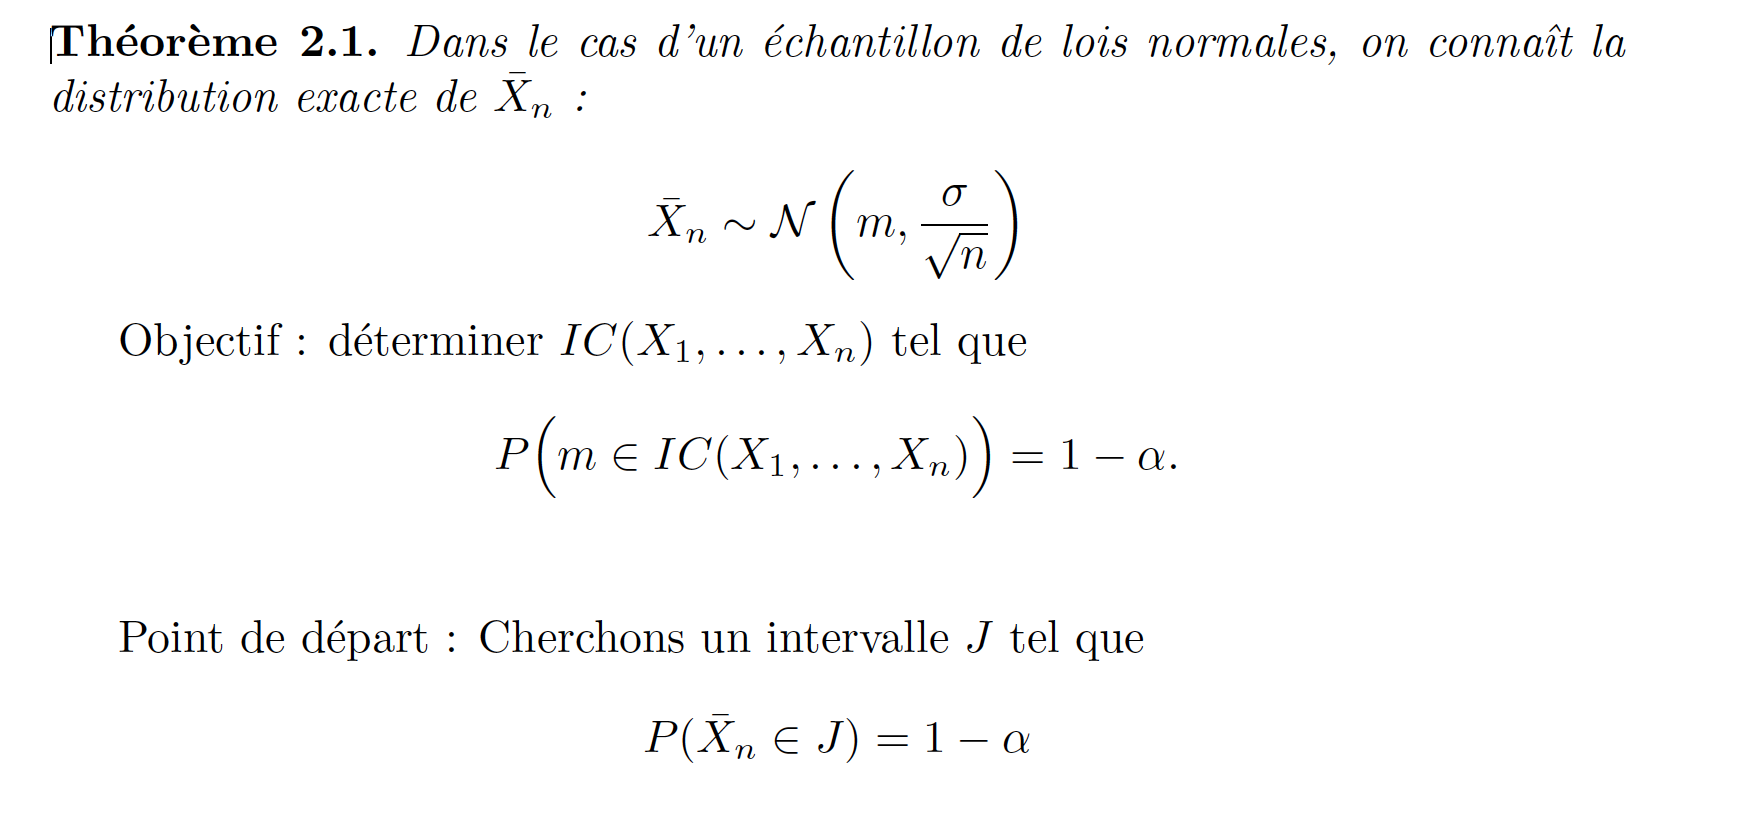

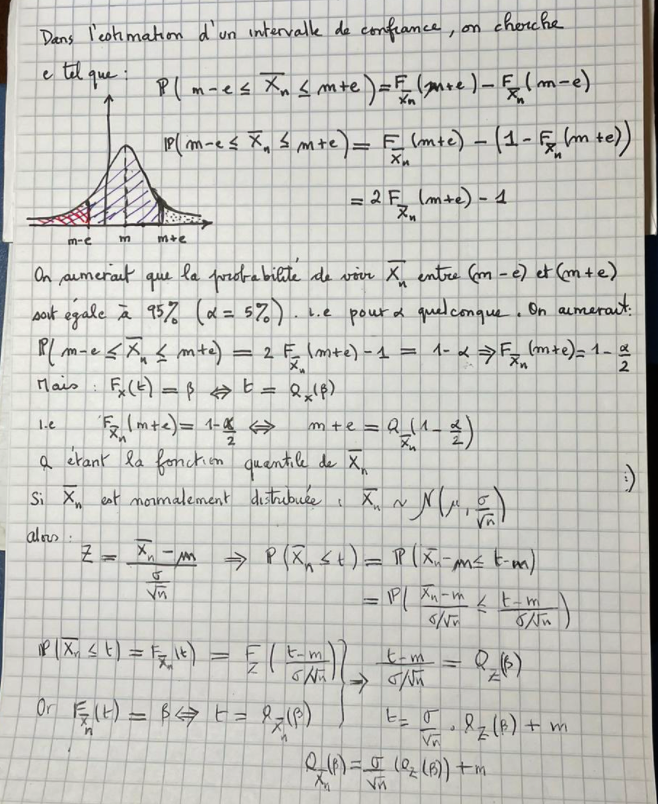

# <a name='link6'>**Intervalle de confiance**</a>

#### **Voyons comment l'intervalle de confiance est construit pour la moyenne de la population lorsque l'écart type est connu**

C'est rarement le cas lorsque vous connaissez l'écart-type de la population et non la moyenne. Cependant, ce n'est peut-être pas une hypothèse aussi improbable qu'il n'y paraît. Pour un processus de fabrication serré qui est en place depuis longtemps, la variabilité du processus peut être contrôlée, mais avec de petits changements de température ou d'humidité, la moyenne peut changer.


Construisons l'intervalle de confiance pour un exemple où la moyenne de la population est inconnue et l'écart type est connu.



La teneur en caféine (en mg) a été examinée pour un échantillon aléatoire de 50 tasses de café noir distribuées par une nouvelle machine à café. La moyenne de l'échantillon est de 110 mg. On sait que l'écart type de toutes les machines de ce fabricant est de 7 mg. Construire un intervalle de confiance à 95 % pour μ, la teneur moyenne en caféine des tasses distribuées par la machine.




In [ ]:
# importer la fonction requise
from scipy.stats import norm

# définir les valeurs de la moyenne de l'échantillon et du sigma
x_bar, sigma = 110, 7

# définir la valeur de la taille de l'échantillon
n = 50

# Construire un intervalle de confiance
np.round(norm.interval(0.95, loc=x_bar, scale=sigma / np.sqrt(n)), 2)

array([108.06, 111.94])

#### Aperçu
* 95 % du temps, la teneur moyenne en caféine des tasses de café distribuées par la machine sera comprise entre 108,06 mg et 111,94 mg.

#### **Voyons comment l'intervalle de confiance est construit pour la moyenne de la population lorsque l'écart type est inconnu**

L'exemple discuté ci-dessus est basé sur l'hypothèse que l'écart-type de la population est connu. Cependant, dans la majorité des cas, cette hypothèse ne sera pas satisfaite.

Lorsqu'on ne connaît pas l'écart-type de la population, on peut l'estimer à partir de l'échantillon. Dans ce cas, la moyenne de l'échantillon suit la distribution t de Student avec (n-1) degrés de liberté.

Tout comme la distribution normale, la distribution t est également très utile dans l'inférence statistique. Il s'agit d'une distribution symétrique autour de 0. Pour un df très grand, la distribution t est presque identique à la distribution normale standard. Le paramètre de la distribution t est appelé degrés de liberté.

Vous trouverez ci-dessous le graphique de la distribution t pour différents degrés de liberté (k). Nous pouvons remarquer que la distribution se rapproche de la normale lorsque la valeur de k augmente.

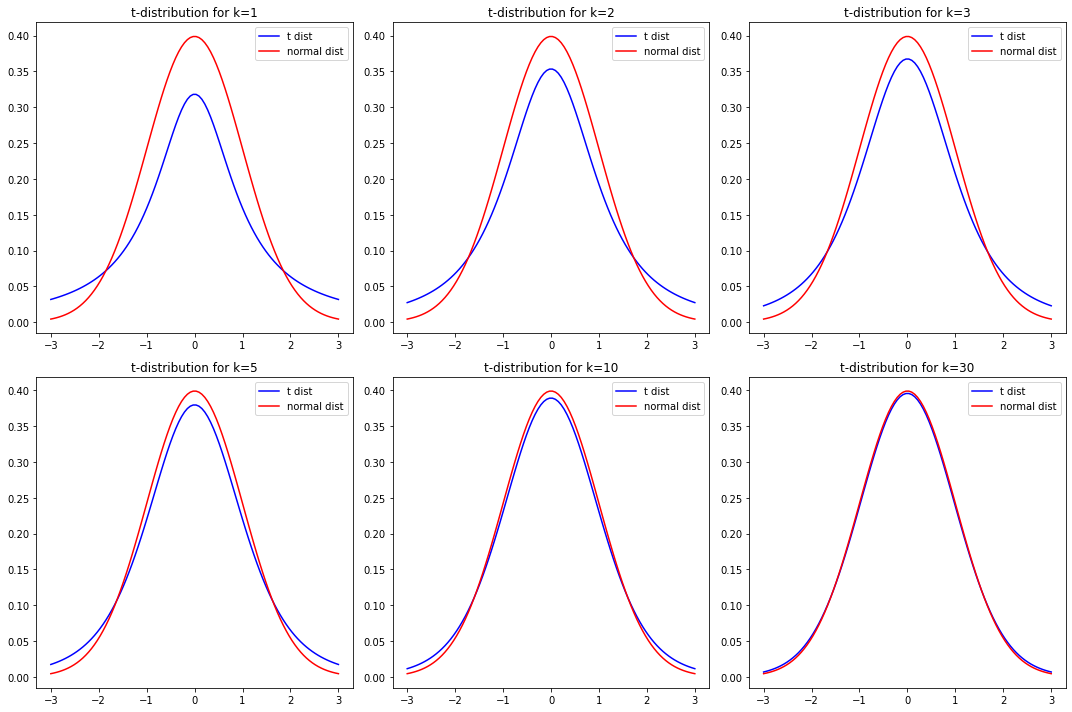

In [ ]:
# importer la fonction requise
from scipy.stats import t
from scipy.stats import norm

# définir les valeurs pour x
x = np.linspace(-3, 3, 100)

# tracer la distribution t pour différentes valeurs de k
fig, axes = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(15, 10))
axes = axes.ravel()
for i, k in zip(range(6), [1, 2, 3, 5, 10, 30]):
    ax = axes[i]
    ax.plot(x, t.pdf(x, df=k), color="blue", label="t dist")
    ax.plot(x, norm.pdf(x), color="red", label="normal dist")
    ax.set_title("t-distribution for k={0}".format(k))
    ax.legend(loc="upper right", fontsize=10)
plt.tight_layout()

Utilisons la distribution t pour construire l'intervalle de confiance pour la moyenne lorsque l'écart type de la population est inconnu.

La teneur en caféine (en mg) a été examinée pour un échantillon aléatoire de 50 tasses de café noir distribuées par une nouvelle machine. La moyenne de l'échantillon est de 110 mg et l'écart type de l'échantillon est estimé à 7 mg. Construire un intervalle de confiance à 95 % pour μ, la teneur moyenne en caféine des tasses distribuées par la machine.

In [ ]:
# importez la fonction requise
from scipy.stats import t

# définir les valeurs de la moyenne de l'échantillon et de l'écart type de l'échantillon
x_bar, s = 110, 7

# définir la valeur de la taille de l'échantillon et des degrés de liberté
n = 50
k = n - 1

# construire l'intervalle de confiance
np.round(t.interval(0.95, df=k, loc=x_bar, scale=s / np.sqrt(n)), 2)

array([108.01, 111.99])

#### Aperçu
* 95 % du temps, la teneur moyenne en caféine des tasses de café distribuées par la machine sera comprise entre 108,01 mg et 111,99 mg.

#### Points clés à retenir

* L'intervalle de confiance pour la moyenne de la population peut être construit pour les deux cas lorsque l'écart-type de la population est connu et lorsqu'il est inconnu. Ce dernier cas est plus courant et nécessite l'application de la distribution t avec des degrés de liberté appropriés.


* L'approche générale de la construction de l'intervalle de confiance consiste à utiliser la statistique d'échantillon appropriée pour estimer le paramètre de population et à utiliser le point centile approprié de la distribution d'échantillonnage.